In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import pandas as pd
pd.options.mode.chained_assignment = None  # supress warnings
default='warn'
from matplotlib import gridspec
from statannot import add_stat_annotation
pd.options.display.max_columns=100
from scripts_sbs1_regression import plot_regression, plot_regression_combined, plot_regression_with_independent, cell_division_rate_increase, ci95, ci5, cell_division_rate_increase_external
from itertools import product

### Load metadata

In [2]:
df_meta = pd.read_csv("../../data/SuppTable1_sample_metadata - metadata.tsv",sep="\t")
df_meta=df_meta[df_meta["is_blacklisted"]==False]
#df_age = pd.read_csv("/home/fran/Documents/cuppen/HPC/tunnel/cuppen/projects/P0025_PCAWG_HMF/drivers/analysis/dna-rep-ann/final-update/r-objects/meta_data_with_age.tsv",sep="\t") # age information is patient-sensitive
df_meta.shape[0]

5365

In [3]:
df_data = pd.read_csv("../data/sbs1_sbs5_counts.tsv",sep="\t").merge(df_meta) # this is equivalent to the sbs1 counts sheet from Extended Data Table 4, but age from Hartwig could not be shared because is patient-sensitive data
df_data = df_data[(df_data["smnv_load"]<30000)&(df_data["sbs1_count"]<5000)&(np.isfinite(df_data["age"]))] # remove hypermutators and samples lacking age
print (df_data.shape[0])

3925


### Define cancer types for the analyses

In [4]:
ttypes=["Breast carcinoma", "Glioblastoma multiforme", "Colorectal carcinoma", "Esophageal carcinoma",
                          "Stomach carcinoma", "Cholangiocarcinoma", "Hepatocellular carcinoma", "Pancreas carcinoma",
                          "Pancreas neuroendocrine", "Cervical carcinoma", 'Ovarian serous adenocarcinoma', "Uterus carcinoma",
                          "Upper respiratory tract carcinoma", "Kidney renal clear cell carcinoma", "Lung adenocarcinoma","Lung squamous cell carcinoma",
                          "Diffuse large B-cell lymphoma", "Prostate carcinoma", "Skin melanoma", "Leiomyosarcoma",
                          "Liposarcoma", "Thyroid carcinoma", "Bladder urothelial carcinoma"]

ttypes_selected=["Breast carcinoma", "Prostate carcinoma","Kidney renal clear cell carcinoma", "Thyroid carcinoma",
                          "Colorectal carcinoma","Ovarian serous adenocarcinoma"]

# Prepare and visualize SBS1 regressions

##### SBS1 regressions, 23 cancer types (Extended Data Fig. 4a)

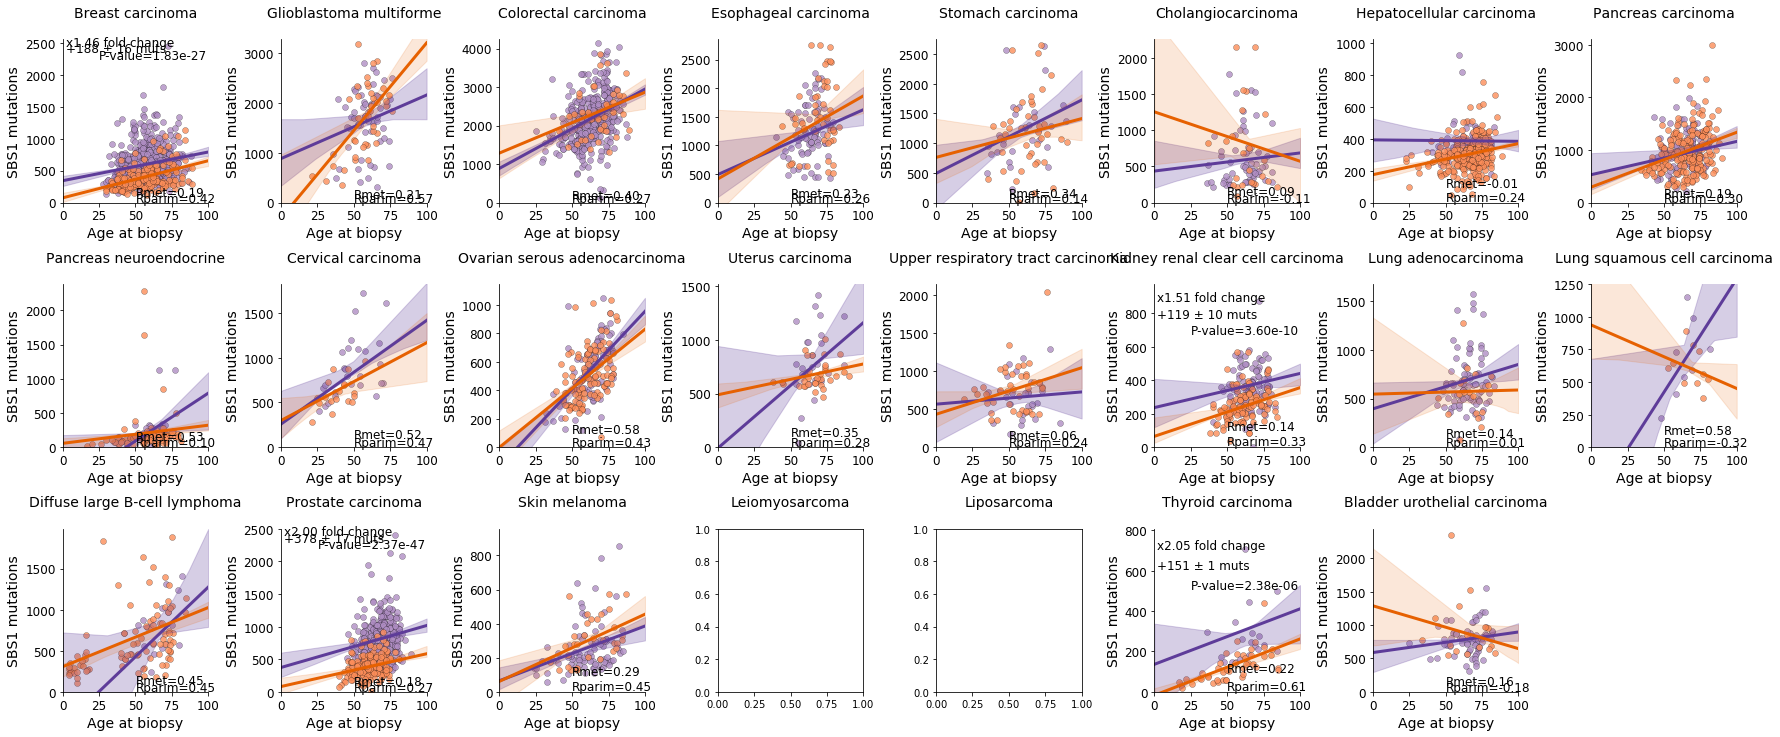

In [5]:
d_diff,df_stats=plot_regression_combined(df_data=df_data,name="",plot_pearsonr=True)

##### Save regression data

In [8]:
columns=['cancer_type','cancer_type_code','n_met', 'n_prim', 'slope_primary', 'intercept_primary','rvalue_res_prim','pvalue_res_prim',
       'slope_met', 'intercept_met','rvalue_res_met','pvalue_res_met',
        'fold_change_met', 'std_fold_change_met','mean_diff_residual',
       'std_diff_residual','pvalue','median_offset_ages']
df_stats[columns].rename(columns={"pvalue":"pvalue_diff_distributions"}).to_csv("../results/results_sbs1_general.tsv",sep="\t",index=False)

##### SBS1 ploidy corrected regressions, selected cancer types (Extended Data Fig. 4a)

In [10]:
df_data["clock_like_number_ploidy_corrected"] = df_data["sbs1_count"] / df_data["ploidy"]

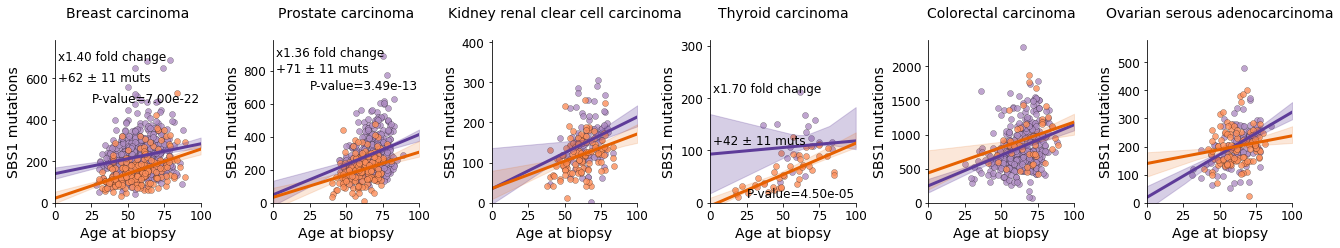

In [11]:
d_diff,df_stats_ploidy=plot_regression_combined(df_data=df_data,name="_ploidycorr",column="clock_like_number_ploidy_corrected",ttypes=ttypes_selected)
columns=['cancer_type','cancer_type_code','n_met', 'n_prim', 'slope_primary', 'intercept_primary','rvalue_res_prim','pvalue_res_prim',
       'slope_met', 'intercept_met','rvalue_res_met','pvalue_res_met',
        'fold_change_met', 'std_fold_change_met','mean_diff_residual',
       'std_diff_residual','pvalue','median_offset_ages']
df_stats_ploidy[columns].rename(columns={"pvalue":"pvalue_diff_distributions"}).to_csv("../results/results_sbs1_ploidy_corrected.tsv",sep="\t",index=False)

In [105]:
df_stats_ploidy

,cancer_type,cancer_type_code,slope_primary,intercept_primary,slope_met,intercept_met,mean_diff_residual,std_diff_residual,fold_change_met,std_fold_change_met,n_met,n_prim,pvalue,pvalue_res_met,rvalue_res_met,pvalue_res_prim,rvalue_res_prim,median_offset_ages,std_offset_ages
0,Breast carcinoma,BRCA,2.359131,22.294484,1.433982,140.509038,62.144929,11.057079,1.399622,0.140083,600,188,6.996363e-22,1.051718e-04,0.181806,2.818876e-09,0.474339,-22.865330,38.988743
1,Prostate carcinoma,PRAD,2.727952,33.726410,3.637424,49.412776,70.805874,10.869714,1.356336,0.003886,348,152,3.494024e-13,3.770245e-05,0.252167,3.422424e-03,0.271950,-20.088925,42.937860
2,Kidney renal clear cell carcinoma,KIRC,1.356471,35.513589,1.788002,34.663174,25.302970,5.157517,1.212908,0.014832,96,106,2.235539e-05,1.994491e-02,0.273812,6.033914e-03,0.304471,-18.589212,42.577813
3,Thyroid carcinoma,THCA,1.197202,-6.042599,0.252851,92.903618,41.712847,11.286573,1.698700,0.339576,19,44,4.497054e-05,7.217914e-01,0.104658,1.138348e-06,0.734503,-37.972585,36.760720
4,Colorectal carcinoma,COREAD,7.426608,440.133561,8.931728,250.351074,-98.563092,17.988707,0.886111,0.031946,367,40,8.752319e-01,1.778104e-08,0.331499,2.041948e-01,0.238586,21.789598,43.936331
5,Ovarian serous adenocarcinoma,OV,0.987445,139.731139,3.038691,19.149059,3.735876,24.515831,1.011475,0.122676,101,109,1.963861e-01,2.744832e-05,0.461273,1.769072e-01,0.150580,-3.086031,74.996311


##### SBS5/SBS40 ploidy corrected regressions, selected cancer types (Extended Data Fig. 4a)

In [12]:
df_data["SBS5/40_ploidy_corrected"] = df_data["sbs5/40_count"] / df_data["ploidy"]

##### ploidy corrected

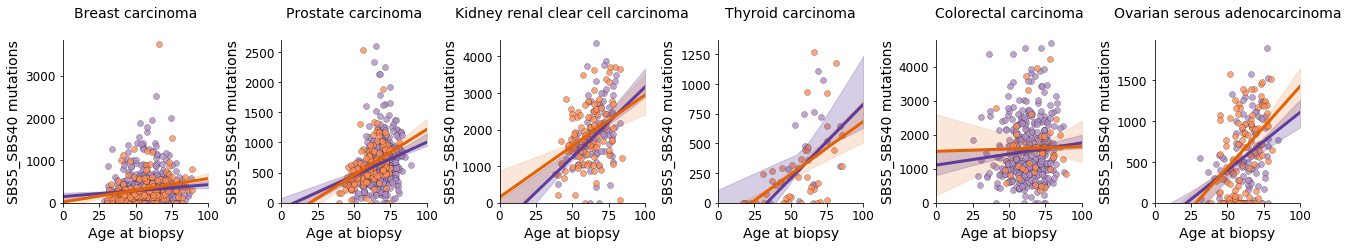

In [13]:
d_diff,df_stats_sbs5_ploidy=plot_regression_combined(df_data=df_data,name="_SBS5_SBS40_ploidy_corrected_selected",column="SBS5/40_ploidy_corrected",sbs="SBS5_SBS40",ttypes=ttypes_selected)

In [14]:
df_stats_sbs5_ploidy.rename(columns={"pvalue":"pvalue_diff_distributions"}).to_csv("../results/results_sbs5_ploidy.tsv",sep="\t",index=False)

##### Clonal-only regressions, Supp. Note 3

In [119]:
df_data["sbs1_clonal"] = df_data["sbs1_clonal_early"] + df_data["sbs1_clonal_late"] + df_data["sbs1_clonal_na"]

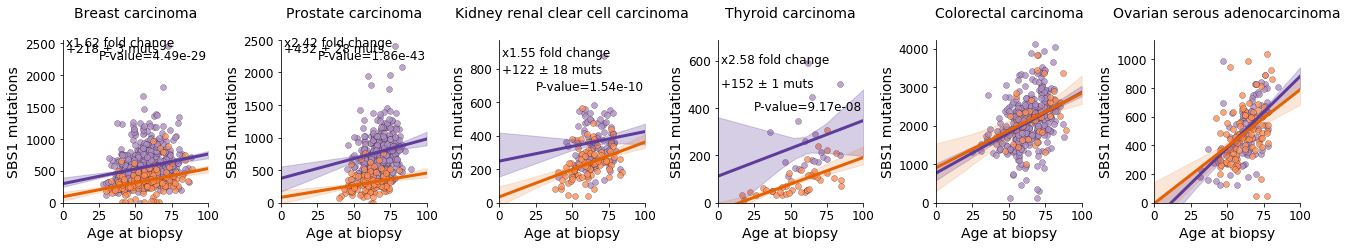

In [127]:
d_diff,df_stats_clonality=plot_regression_combined(df_data=df_data,column="sbs1_clonal",name="clonal_sbs1",ttypes=ttypes_selected)

In [131]:
df_stats_clonality.rename(columns={"pvalue":"pvalue_diff_distributions"}).to_csv("../results/results_sbs1_clonal_only_muts.tsv",sep="\t",index=False)

### Cancer type specific analyses, including independent cohorts (Supp. Note 3 and Extended Data Figure 4)

### Breast carcinoma

##### BRCA -subtypes, Extended Data Figure 4

In [15]:
hmf=df_meta[(df_meta["cancer_type_code"]=="BRCA")&(df_meta["cohort"]=="Hartwig")]["cancer_subtype"].value_counts()>=5
pcawg=df_meta[(df_meta["cancer_type_code"]=="BRCA")&(df_meta["cohort"]=="PCAWG")]["cancer_subtype"].value_counts()>=5
subtypes_selected=hmf[hmf&pcawg].index

ER+/HER2-
TNBC
ER+/HER2+
ER-/HER2+


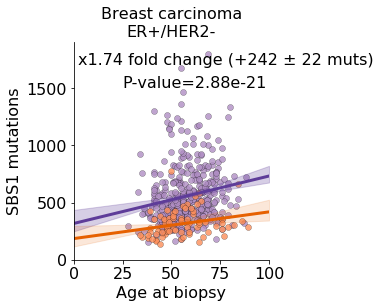

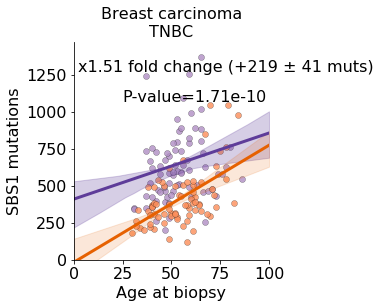

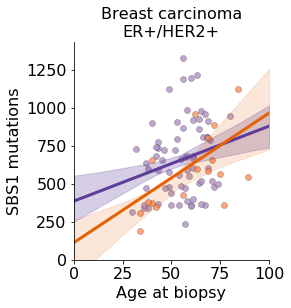

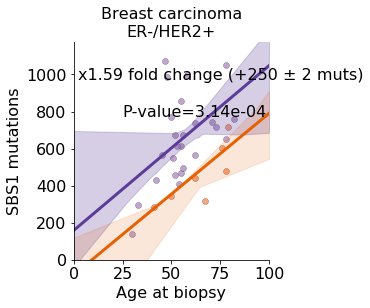

In [16]:
l=[]
for subtype in subtypes_selected:
    samples_subtype_hmf = list(df_meta[(df_meta["cancer_subtype"]==subtype)&(df_meta["cohort"]=="Hartwig")]["sample_id"])
    samples_subtype = samples_subtype_hmf + list(df_meta[(df_meta["cancer_subtype"]==subtype)&(df_meta["cohort"]=="PCAWG")]["sample_id"])
    print (subtype)
    sp,ip, sm,ie, mean_diff_res, std_diff_res, fraction_met, mean_diff_res_offset, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim=plot_regression("Breast carcinoma","BRCA",df_data=df_data[df_data["sample_id"].isin(samples_subtype)],name="_"+subtype,title2=subtype)
    l.append(["Breast carcinoma","BRCA",subtype,sp,ip, sm,ie, mean_diff_res, std_diff_res, fraction_met, mean_diff_res_offset, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim])
df_stats_subtypes = pd.DataFrame(l,columns=["cancer_type","cancer_type_code","subtype","slope_primary","intercept_primary","slope_met","intercept_met",
                                  "mean_diff_residual","std_diff_residual","fold_change_met","std_fold_change_met","n_met","n_prim","pvalue",
                                  "pvalue_res_met","rvalue_res_met", "pvalue_res_prim","rvalue_res_prim"])
columns_subtype=["cancer_type","cancer_type_code","subtype","n_met","n_prim",'slope_primary', 'intercept_primary','rvalue_res_prim','pvalue_res_prim',
       'slope_met', 'intercept_met','rvalue_res_met','pvalue_res_met',
        'fold_change_met', 'std_fold_change_met','mean_diff_residual',
       'std_diff_residual','pvalue']
df_stats_subtypes[columns_subtype].rename(columns={"pvalue":"pvalue_diff_distributions"}).to_csv("../results/results_sbs1_brca_subtype.tsv",sep="\t",index=False)

##### Evaluate independent paired-biopsy dataset (DOI:10.1016/j.ccell.2017.07.005.)

In [19]:
!cp /home/fran/Documents/cuppen/HPC/tunnel/cuppen/projects/P0025_PCAWG_HMF/drivers/analysis/dna-rep-ann/final-update/external_datasets/lyates_cancer_cell_2014//results/r-objects/meta_lyates_cpg_counts.tsv ../data/

In [5]:
df_lyates_brca = pd.read_csv("../data/meta_lyates_cpg_counts.tsv",sep="\t")
primary_samples=df_lyates_brca[(df_lyates_brca["Sequencing_APPROACH"].str.contains("WGS"))&(df_lyates_brca["SAMPLE_CATEGORY"]=="PRIMARY")]["sample"].values
patients_with_primary=df_lyates_brca[(df_lyates_brca["Sequencing_APPROACH"].str.contains("WGS"))&(df_lyates_brca["SAMPLE_CATEGORY"]=="PRIMARY")]["prefix"].values
df_lyates_brca[(df_lyates_brca["Sequencing_APPROACH"].str.contains("WGS"))&(df_lyates_brca["SAMPLE_CATEGORY"]!="MATCHED_NORMAL")&(df_lyates_brca["SAMPLE_CATEGORY"]!="PRIMARY")&(df_lyates_brca["prefix"].isin(patients_with_primary))].sort_values("prefix")

,sample,prefix,suffix,normal_used,matched_normal,INCLUDE_REL_MET,INCLUDE_GENOME_STUDY,INCLUDE_PRIMARY_SYNC_LN_ANA,Sampling,Fixative_storage,Sequencing_APPROACH,Proc as Tum,SAMPLE_CATEGORY,SAMPLE_CODE,Location_details,Gender,Age_at_diagnosis,Children,T_stage,T_size_diagnosis,N_details,N_stage,Num_nodes,Node_pos_at_diagnosis,M_at_diagnosis,STAGE,Grade_Primary,ER_primary,PR_primary,HER2_primary_IHC,ER_status_biopsy,PR_status_biopsy,HER2_status_clinical_bx,Adjuvant_treatment,Treatment_of_met_pre_biopsy,INCLUDE_LAST_TREATMENT_ANALYSIS,Last_systemic_therapy_pre_biopsy,New_gene_after_bx,Therapy_immediately_post_biopsy,INCLUDE_RESPONSE_COHORT,Therapy_immediately_post_biopsy_coded,RESPONSE_CODE,Response_Therapy_immediately_post_biopsy,Later_treatment,Response_later_treatment,days_to_relapse,days_to_biopsy,days_to_biopsy_coded,days_to_death,days_to_last_live_follow,survival,relapse_free_survival,status_survival,status_relapse,designated_primary,HISTO_EXT,CODED_HISTO,primary_relapse_set,multi_relapse_set,prior RT,num_systemic_txs,prev_chemo,prev_anthracyclines,prev_taxanes,FUMi,CMF,prev_hormones,prev_AI,prev_Tam,HR_loss,ER_switch,PgR_switch,HER2_seq_primary,HER2_CI,HER2_logR,HER2_amp_any_sample,ER_HER2_PRIMARY,L2_3_TP53_mt,SIMPLIFIED_SAMPLE_CODE,tot_sample_count,tot_sample_count_excl,tot_patient_count,sbs1_sample_count,sbs1_sample_count_excl,sbs1_patient_count,ctot_sample_count,ctot_sample_count_excl,ctot_patient_count,age_at_biopsy
0,PD11458a,PD11458,a,PD11458b,YES,YES,YES,NO,block_sample,FrFr,WGS,Y,DISTANT_LYMPH_NODE_METASTASIS,DISTANT_METASTASIS,contralateral lymph_node (relapse),F,49,NaN,T4,90.0,N2,N2,NaN,YES,0,IIIB,3,Positive,Pos,Neg,Pos,Pos,NaN,"3xFAC+1xTaxotere,letrozole, RT(all NEO)","3xFAC+1xTaxotere, femara, RT(all NEO)",1.0,ENDOCRINE,TSC2,hormone therapy,1.0,ENDOCRINE,STABLE,No response femara and FAC,NaN,NaN,0.0,259,259,612.0,NaN,612.0,0.0,1.0,1.0,NO,NaN,NaN,YES,NO,YES,2,1,1,1,0,0,1,1,0,NO,NO,NO,HER2_NEG,NaN,NaN,NO,ER+/HER2-,0,METASTASIS,14381,4936,18083,2302,330,2599,5103,1608,6207,49.7
19,PD11459a,PD11459,a,PD11459b,YES,NO,YES,YES_LOCAL_LN,block_sample,FrFr,WGS,Y,SYNC_LOCAL_LYMPH_NODE_METASTASIS,SYNC_LN,Tumour_metastasis_to_local_lymph_node,F,59,NaN,T2,25.0,N1,N1,NaN,YES,0,IIB,3,Positive,Pos,NaN,Pos,Pos,NaN,RT + Tam(2 years),none,NaN,NaN,NaN,tamoxifen,NaN,ENDOCRINE,NaN,NaN,na,na,3873.0,13,13,NaN,4726.0,4726.0,3873.0,0.0,1.0,NO,NaN,NaN,NO,NO,NO,1,0,0,0,0,0,1,0,1,NO,NO,NO,HER2_NEG,NaN,NaN,NO,ER+/HER2-,0,METASTASIS,1617,242,1792,129,11,145,386,35,427,59.0
1,PD11460a,PD11460,a,PD11460b,YES,YES,YES,YES_LOCAL_LN,block_sample,FrFr,WGS,Y,SKIN_DISTANT_METASTASIS,DISTANT_METASTASIS,Tumour_metastasis_to_distant_location,F,75,NaN,T2,50.0,N2,N2,NaN,YES,0,IIIA,3,Positive,Pos,NaN,Pos,Neg,NaN,NaN,hormones_1st line,1.0,ENDOCRINE,FGFR1,horomones_2nd_line,1.0,ENDOCRINE,PROGRESSION,progression,na,na,1024.0,1575,1575,1654.0,NaN,1654.0,1024.0,1.0,1.0,NO,NaN,NaN,YES,NO,NO,1,0,0,0,0,0,1,0,1,YES,NO,LOSS,HER2_NEG,NaN,NaN,NO,ER+/HER2-,0,METASTASIS,7014,3028,10866,814,324,1198,1790,712,2644,79.3
7,PD11461a,PD11461,a,PD11461b,YES,YES,YES,NO,block_sample,FrFr,WGS,Y,Ipsi_BREAST_OR_CHEST_WALL,LOCAL_RELAPSE,Tumour_local_recurrence,F,44,NaN,T1,8.0,N0,N0,0.0,NO,0,IA,3,Positive,Pos,NaN,NaN,NaN,NaN,RT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,612.0,783,783,1331.0,NaN,1331.0,612.0,1.0,1.0,NO,NaN,NaN,YES,NO,YES,0,0,0,0,0,0,0,0,0,UK,UK,UK,HER2_NEG,NaN,NaN,NO,ER+/HER2-,0,METASTASIS,3942,863,4015,165,31,172,489,130,498,46.1
2,PD13596c,PD13596,c1,PD13596b,YES,YES,YES,NO,Biopsy,FrFr,WGS,Y,LIVER_METASTASIS,DISTANT_METASTASIS,liver biopsy 1,F,43,2.0,T2,NaN,N1,NaN,NaN,NaN,0,IIB,2,Positive,Pos,Neg,Pos,Neg,Neg,"FEC x6, Tamoxifen(3 years)","AI( Letrozole 4 years 2007-2011, SD until 2011)",1.0,ENDOCRINE,ESR1,Fulvestrant (3 years),1.0,ENDOCRINE,PROGRESSION,"PD in liver, bone stable",Capecitabine,PR,3524.0,5024,5024,NaN,6342.0,6342.0,3524.0,0.0,1.0,NO,infiltrating ductal carcinoma,InfiltratingDuctal,YES,NO,NO,3,1,1,0,0,0,2,1,1,YES,NO,LOSS,HER2_NEG,NaN,NaN,NO,ER+/HER2-,0,MET

##### Select samples (see Supp. Note 3)

In [6]:
pairs_selected_total = [
    ("PD11460d","PD11460a"), # selected of distant biopsy, larger time to biopsy
    ("PD13596a","PD13596c"), # only one met sample, distant met
    ("PD4243a","PD4243c"), # only one met sample, distant met
    ("PD9193a","PD9193c"), # only one met sample, distant met
     ("PD9771d","PD9771e") # distant met
]# PD8948 --> does not have primary

samples_met = [x[1] for x in pairs_selected_total]
primary_df_independent = df_lyates_brca[(df_lyates_brca["sample"].isin(x[0] for x in pairs_selected_total))][["sample","Age_at_diagnosis","days_to_biopsy","sbs1_sample_count","sbs1_sample_count_excl"]].rename(columns={"sample":"sample_id","sbs1_sample_count":"sbs1_count"}).sort_values("sample_id")
primary_df_independent["age"] = primary_df_independent.apply(lambda row: float(row["Age_at_diagnosis"]) + (float(row["days_to_biopsy"])/365.0),axis=1)
met_df_independent = df_lyates_brca[(df_lyates_brca["sample"].isin(x[1] for x in pairs_selected_total))][["sample","Age_at_diagnosis","days_to_biopsy","sbs1_sample_count","sbs1_sample_count_excl"]].rename(columns={"sample":"sample_id","sbs1_sample_count":"sbs1_count"}).sort_values("sample_id")
met_df_independent["age"] = met_df_independent.apply(lambda row: float(row["Age_at_diagnosis"]) + (float(row["days_to_biopsy"])/365.0),axis=1)

##### Overlay samples into regression

Pvalue met  MannwhitneyuResult(statistic=1460.0, pvalue=0.9191675069631602) -45.63467230472713 -2.666195637131791
Pvalue primary  MannwhitneyuResult(statistic=579.0, pvalue=0.37877928942918526) 31.27555835337846 -7.244351724781546


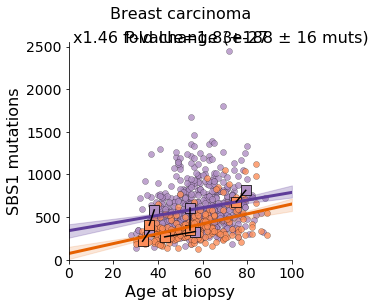

In [7]:
l=[]
sp,ip, sm,ie, mean_diff_res, std_diff_res, fold_change, std_fold_change, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim=plot_regression_with_independent("Breast carcinoma","BRCA",df_data,primary_df_independent,met_df_independent,name="lyates_et_al_brca")
l.append(["Breast cancer","BRCA",sp,ip, sm,ie, mean_diff_res, std_diff_res, fold_change, std_fold_change, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim])
df_stats_lyates = pd.DataFrame(l,columns=["cancer_type","cancer_type_code","slope_primary","intercept_primary","slope_met","intercept_met",
                                  "mean_diff_residual","std_diff_residual","fold_change_met","std_fold_change_met","n_met","n_prim","pvalue",
                                  "pvalue_res_met","rvalue_res_met", "pvalue_res_prim","rvalue_res_prim"])

##### Comparison of SBS1 mutation rate 

In [26]:
primary_df_independent.reset_index(inplace=True)
met_df_independent.reset_index(inplace=True)

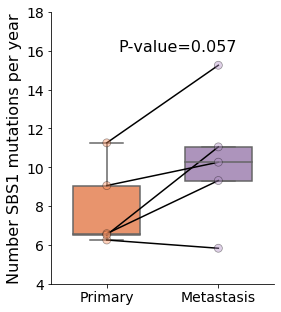

In [28]:
fig,ax=plt.subplots(figsize=(4,5))
primary_df_independent["type"] = "Primary"
primary_df_independent["SBS1_year"] = primary_df_independent["sbs1_count"] / primary_df_independent["age"]
met_df_independent["type"] = "Metastasis"
met_df_independent["SBS1_year"] = met_df_independent["sbs1_count"] / met_df_independent["age"]
t=pd.concat([met_df_independent,primary_df_independent])
sns.boxplot(data=t,x="type",y="SBS1_year",showfliers=False,order=["Primary","Metastasis"],palette={"Metastasis":"#af8dc3","Primary":"#fc8d59"},width=0.6,ax=ax)
ax=sns.stripplot(data=t,x="type",y="SBS1_year",order=["Primary","Metastasis"],palette={"Metastasis":"#af8dc3","Primary":"#fc8d59"},edgecolor="black",linewidth=0.7,s=8,alpha=0.4,ax=ax,jitter=False)
_,p=st.ttest_rel(primary_df_independent["SBS1_year"],met_df_independent["SBS1_year"])


for x in range(primary_df_independent.shape[0]):
    pr,met=primary_df_independent.loc[x]["SBS1_year"],met_df_independent.loc[x]["SBS1_year"]
    ax.plot([0,1.],[pr,met],color="black")
    
    

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel("")
ax.set_ylabel("Number SBS1 mutations per year",fontsize=16)
ax.set_ylim(4,18)
ax.annotate(xy=(0.1,16),s=f"P-value={p:1.3f}",fontsize=16)
plt.savefig(f'../results/figures/lyates_paired_biopsies_muts_per_year.pdf', dpi=800,bbox_inches="tight")

##### Indpeendent cohort, Whole-exome sequencing
1. Using TCGA as primary independet 
2. Using Hartwig (wes downsampled) as met

In [30]:
!cp /home/fran/Documents/cuppen/HPC/tunnel/cuppen/projects/P0025_PCAWG_HMF/drivers/analysis/dna-rep-ann/final-update/external_datasets/prostate_exome/results/r-objects/prim_exom/metadata_included_BRCA.tsv ../data/hartwig_wes_counts_brca.tsv
!cp /home/fran/Documents/cuppen/HPC/tunnel//cuppen/projects/P0025_PCAWG_HMF/drivers/analysis/dna-rep-ann/final-update/external_datasets/prostate_exome/results/r-objects/tcga_exom/meta_BRCA_tcga_prim_with_counts.tsv ../data/tcga_wes_counts_brca.tsv


In [18]:
df_stats_brca_wes

,cancer_type,cancer_type_code,subgroup,slope_primary,intercept_primary,slope_met,intercept_met,mean_diff_residual,std_diff_residual,fold_change_met,std_fold_change_met,n_met,n_prim,pvalue,pvalue_res_met,rvalue_res_met,pvalue_res_prim,rvalue_res_prim
0,Breast carcinoma,BRCA,WES,0.13169,4.258183,0.1684,9.346833,7.313503,0.438747,1.602972,7.375833,600,1000,0.0,0.000015,0.202801,3.549084e-08,0.199572


/home/fran/miniconda3/envs/global/lib/python3.6/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/fran/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/fran/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Pvalue met  MannwhitneyuResult(statistic=0.0, pvalue=0.0) nan 0.18969194723230592
Pvalue primary  MannwhitneyuResult(statistic=0.0, pvalue=0.0) nan -0.09924237142059959


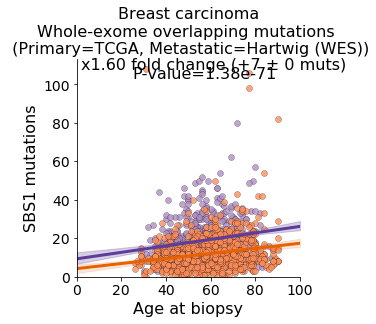

In [14]:
# met dataset
df_data_hmf_exome=pd.read_csv("../data/hartwig_wes_counts_brca.tsv",sep="\t")
df_data_hmf_exome=df_data_hmf_exome[(df_data_hmf_exome["sample_id"].isin(df_data[df_data["cohort"]=="Hartwig"]["sample_id"]))][["sample_id","cancer_type","cancer_type_code","sbs1_count","tot_count","age"]].merge(df_meta[["sample_id","cohort"]]).rename(columns={"age_at_biopsy":"age"})
df_data_hmf_exome["cohort"] = "Hartwig"
maxv=1.5*np.nanmax(df_data_hmf_exome["sbs1_count"]) # this will be the maximum number of exome mutations to be considered hypermutator in the primary 
# primary dataset
df_brca_tcga_ex = pd.read_csv("../data/tcga_wes_counts_brca.tsv",sep="\t",usecols=["case_submitter_id","age_at_index","sbs1_count","tot_count"]).rename(columns={"age_at_index":"age"}).drop_duplicates()
df_brca_tcga_ex=df_brca_tcga_ex[df_brca_tcga_ex["tot_count"]>0] # remove samples with no mutation info
df_brca_tcga_ex["cohort"] = "PCAWG"

df_data_exome= pd.concat([df_data_hmf_exome,df_brca_tcga_ex])
df_data_exome["cancer_type"] = "Breast carcinoma"
df_data_exome["cancer_type_code"] = "BRCA"
df_data_exome=df_data_exome[(df_data_exome["sbs1_count"]<=maxv)] # remove hypermutators

sp,ip, sm,ie, mean_diff_res, std_diff_res, fold_change, std_fold_change, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim=plot_regression_with_independent("Breast carcinoma","BRCA",df_data_exome,primary_df_independent=pd.DataFrame([],columns=["sbs1_count","age"]),met_df_independent=pd.DataFrame([],columns=["sbs1_count","age"]),name="WES_BRCA_TCGA",join=False ,exome=True, title2="Whole-exome overlapping mutations \n (Primary=TCGA, Metastatic=Hartwig (WES))")
l=[]
l.append(["Breast carcinoma","BRCA","WES",sp,ip, sm,ie, mean_diff_res, std_diff_res, fold_change, std_fold_change, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim])
df_stats_brca_wes = pd.DataFrame(l,columns=["cancer_type","cancer_type_code","subgroup","slope_primary","intercept_primary","slope_met","intercept_met",
                                  "mean_diff_residual","std_diff_residual","fold_change_met","std_fold_change_met","n_met","n_prim","pvalue",
                                  "pvalue_res_met","rvalue_res_met", "pvalue_res_prim","rvalue_res_prim"])
columns_subtype=["cancer_type","cancer_type_code","subgroup","n_met","n_prim",'slope_primary', 'intercept_primary','rvalue_res_prim','pvalue_res_prim',
       'slope_met', 'intercept_met','rvalue_res_met','pvalue_res_met',
        'fold_change_met', 'std_fold_change_met','mean_diff_residual',
       'std_diff_residual','pvalue']
df_stats_brca_wes[columns_subtype].rename(columns={"pvalue":"pvalue_diff_distributions"}).to_csv("../results/results_sbs1_brca_WES_TCGA.tsv",sep="\t",index=False)

In [5]:
pvalue

1.3785562220261638e-71

### Prostate carcinoma

##### Using the PCAWG prostate patients that have "metastatic" biopsy (only 5 samples). Included in Supp. Note 3

/home/fran/miniconda3/envs/global/lib/python3.6/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/fran/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/fran/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Pvalue met  MannwhitneyuResult(statistic=0.0, pvalue=0.0) nan 9.331991713474377
Pvalue primary  MannwhitneyuResult(statistic=719.0, pvalue=0.00028801591561974596) 388.40179344067167 13.507262939597041


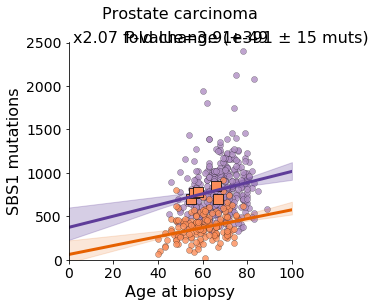

In [35]:
l=[]
primaries=df_meta[(df_meta["cohort"]=="PCAWG")&(df_meta["cancer_type_code"]=="PRAD")&(df_meta["metastatic_location"]=="Primary")]["sample_id"]
met=df_meta[(df_meta["cohort"]=="PCAWG")&(df_meta["cancer_type_code"]=="PRAD")&(df_meta["metastatic_location"]!="Primary")]["sample_id"]
sp,ip, sm,ie, mean_diff_res, std_diff_res, fraction_met, mean_diff_res_offset, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim=plot_regression_with_independent("Prostate carcinoma","PRAD",df_data[(df_data["cohort"]=="Hartwig")|(df_data["sample_id"].isin(primaries))],met_df_independent=pd.DataFrame([],columns=["age","sbs1_count"]),primary_df_independent=df_data[df_data["sample_id"].isin(met)],name="met_prosate_samples_pcawg",join=False)


##### External metastatic dataset WGS, raw uncorrected (https://doi.org/10.1016/j.cell.2018.06.039)

In [37]:
!cp /home/fran/Documents/cuppen/HPC/tunnel/cuppen/projects/P0025_PCAWG_HMF/drivers/analysis/dna-rep-ann/final-update/external_datasets/prostate_meta_wgs_cell2018/results/r-objects/meta_pros18_original_counts.tsv ../data/david_quigley_raw_counts.tsv
!cp /home/fran/Documents/cuppen/HPC/tunnel//cuppen/projects/P0025_PCAWG_HMF/passengers/processed/external_datasets/prostate_meta_wgs_cell2018/2021_05_13_european_urology_2019.txt ../data/david_quigley_age.tsv

Pvalue met  MannwhitneyuResult(statistic=26758.0, pvalue=1.2530986116029273e-15) 535.8739247166732 9.331991713474377
Pvalue primary  MannwhitneyuResult(statistic=0.0, pvalue=0.0) nan 11.316232575642312


/home/fran/miniconda3/envs/global/lib/python3.6/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/fran/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/fran/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


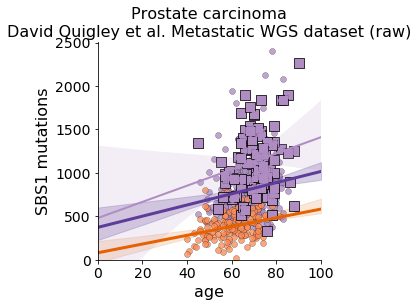

In [7]:
df_external_prad=pd.read_csv("../data/david_quigley_raw_counts.tsv",sep="\t")
age_external_prad = pd.read_csv("../data/david_quigley_age.tsv",sep="\t")
df_external_prad["sbs1_count_norm"] = df_external_prad["sbs1_count"]  
df_external_prad.drop(["sbs1_count"],axis=1,inplace=True)
age_external_prad["age"] = age_external_prad["age_at_diagnosis_in_days"] / 365
df_external_prad=df_external_prad.merge(age_external_prad[["sample_id","age"]].rename(columns={"sample_id":"IDENTIFIER"}))
_m=plot_regression_with_independent("Prostate carcinoma","PRAD",df_data,primary_df_independent=pd.DataFrame([],columns=["sbs1_count","age"]),met_df_independent=df_external_prad.rename(columns={"sbs1_count_norm":"sbs1_count"}),name="PRAD_WGS_David_Quigley_raw",join=False,plot_regression_primary=False,title2="David Quigley et al. Metastatic WGS dataset (raw)",plot_regression_met=True,plot_stats=False)

##### External metastatic dataset WGS, normalized (https://doi.org/10.1016/j.cell.2018.06.039)

Pvalue met  MannwhitneyuResult(statistic=17408.0, pvalue=0.8853774561120662) 149.03773464605325 9.331991713474377
Pvalue primary  MannwhitneyuResult(statistic=0.0, pvalue=0.0) nan 11.316232575642312


/home/fran/miniconda3/envs/global/lib/python3.6/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/fran/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/fran/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


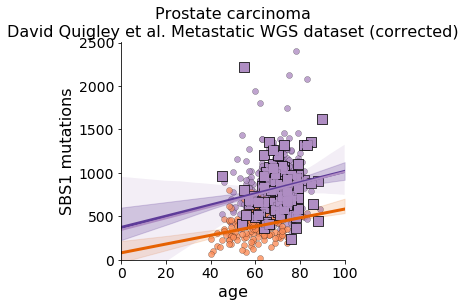

In [8]:
df_external_prad=pd.read_csv("../data/david_quigley_raw_counts.tsv",sep="\t")
df_external_prad["sbs1_count_norm"] = df_external_prad["sbs1_count"] / 1.395  # normalization ratio of Tumor Mutation Burden due to different mutation callers
df_external_prad.drop(["sbs1_count"],axis=1,inplace=True)
df_external_prad=df_external_prad.merge(age_external_prad[["sample_id","age"]].rename(columns={"sample_id":"IDENTIFIER"}))
_m=plot_regression_with_independent("Prostate carcinoma","PRAD",df_data=df_data,primary_df_independent=pd.DataFrame([],columns=["sbs1_count","age"]),met_df_independent=df_external_prad.rename(columns={"sbs1_count_norm":"sbs1_count"}),name="PRAD_WGS_David_Quigley_corrected",join=False,plot_regression_primary=False,title2="David Quigley et al. Metastatic WGS dataset (corrected)",plot_regression_met=True,plot_stats=False)

##### Obtain the fold-change

/home/fran/miniconda3/envs/global/lib/python3.6/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/fran/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/fran/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Pvalue met  MannwhitneyuResult(statistic=0.0, pvalue=0.0) nan 5.755935451492864
Pvalue primary  MannwhitneyuResult(statistic=0.0, pvalue=0.0) nan 11.316232575642312


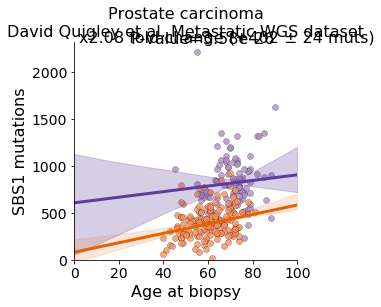

In [9]:
df_external_prad["cohort"] = "Hartwig"
df_data_t = pd.concat([df_data[(df_data["cohort"]=="PCAWG")&(df_data["cancer_type_code"]=="PRAD")],df_external_prad[["IDENTIFIER","age","sbs1_count_norm","cohort"]].rename(columns={"sbs1_count_norm":"sbs1_count","IDENTIFIER":"sample_id"})])
df_data_t["cancer_type_code"]="PRAD"
df_data_t["cancer_type"]="Prostate carcinoma"
sp,ip, sm,ie, mean_diff_res, std_diff_res, fold_change_met, std_fold_change_met, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim=plot_regression_with_independent("Prostate carcinoma","PRAD",df_data_t,primary_df_independent=pd.DataFrame([],columns=["sbs1_count","age"]),met_df_independent=pd.DataFrame([],columns=["sbs1_count","age"]),name="PRAD_WGS_David_Quigley_stats",join=False,plot_regression_primary=False,title2="David Quigley et al. Metastatic WGS dataset",plot_regression_met=False,plot_stats=True)
l=[]
l.append(["Prostate cancer","PRAD","WES",sp,ip, sm,ie, mean_diff_res, std_diff_res, fold_change_met, std_fold_change_met, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim])
df_stats_brca_wes = pd.DataFrame(l,columns=["cancer_type","cancer_type_code","subgroup","slope_primary","intercept_primary","slope_met","intercept_met",
                                  "mean_diff_residual","std_diff_residual","fold_change_met","std_fold_change_met","n_met","n_prim","pvalue",
                                  "pvalue_res_met","rvalue_res_met", "pvalue_res_prim","rvalue_res_prim"])
df_stats_brca_wes[columns_subtype].rename(columns={"pvalue":"pvalue_diff_distributions"}).to_csv("../results/results_sbs1_prad_WGS_David_met.tsv",sep="\t",index=False)

In [10]:
df_stats_brca_wes

,cancer_type,cancer_type_code,subgroup,slope_primary,intercept_primary,slope_met,intercept_met,mean_diff_residual,std_diff_residual,fold_change_met,std_fold_change_met,n_met,n_prim,pvalue,pvalue_res_met,rvalue_res_met,pvalue_res_prim,rvalue_res_prim
0,Prostate cancer,PRAD,WES,5.027521,80.947383,2.982552,607.208217,402.323307,24.44081,2.080069,0.238747,99,152,3.578698e-26,0.454538,0.088271,0.003065,0.274996


##### Using WES indepdendent cohorts
1. Primary, TCGA
2. Met, SU2C-PCF

In [47]:
!cp /home/fran/Documents/cuppen/HPC/tunnel/cuppen/projects/P0025_PCAWG_HMF/drivers/analysis/dna-rep-ann/final-update/external_datasets/prostate_exome/results/r-objects/meta_pros_dfci_with_counts.tsv ../data/prad_dfci_sbs1_counts.tsv
!cp /home/fran/Documents/cuppen/HPC/tunnel//cuppen/projects/P0025_PCAWG_HMF/drivers/analysis/dna-rep-ann/final-update/external_datasets/prostate_exome/results/r-objects/tcga_exom/meta_PRAD_tcga_prim_with_counts.tsv ../data/prac_tcga_sbs1_counts.tsv

/home/fran/miniconda3/envs/global/lib/python3.6/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/fran/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/fran/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Pvalue met  MannwhitneyuResult(statistic=0.0, pvalue=0.0) nan -0.4779216680744447
Pvalue primary  MannwhitneyuResult(statistic=0.0, pvalue=0.0) nan -0.26554932954019117


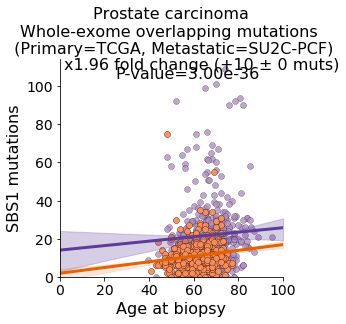

In [11]:
# met tcga
df_prad_dfci_ex = pd.read_csv("../data/prad_dfci_sbs1_counts.tsv",sep="\t").rename(columns={"AGE_AT_PROCUREMENT":"age"})
df_prad_dfci_ex["cohort"] = "Hartwig"
# primary tcga
df_prad_tcga_ex = pd.read_csv("../data/prac_tcga_sbs1_counts.tsv",sep="\t",usecols=["case_submitter_id","age_at_index","sbs1_count","tot_count"]).rename(columns={"age_at_index":"age"})
df_prad_tcga_ex["cohort"] = "PCAWG"
df_data_exome= pd.concat([df_prad_dfci_ex,df_prad_tcga_ex])
df_data_exome["cancer_type"] = "Prostate carcinoma"
df_data_exome["cancer_type_code"] = "PRAD"
df_data_exome=df_data_exome[(df_data_exome["sbs1_count"]<=maxv)] # remove hypermutators

sp,ip, sm,ie, mean_diff_res, std_diff_res, fold_change, std_fold_change, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim=plot_regression_with_independent("Prostate carcinoma","PRAD",df_data_exome,primary_df_independent=pd.DataFrame([],columns=["sbs1_count","age"]),met_df_independent=pd.DataFrame([],columns=["sbs1_count","age"]),name="WES_PRAD_TCGA_DFCI",join=False ,exome=True, title2="Whole-exome overlapping mutations \n (Primary=TCGA, Metastatic=SU2C-PCF)")
l=[]
l.append(["Prostate cancer","PRAD","WES",sp,ip, sm,ie, mean_diff_res, std_diff_res, fold_change, std_fold_change, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim])
df_stats_brca_wes = pd.DataFrame(l,columns=["cancer_type","cancer_type_code","subgroup","slope_primary","intercept_primary","slope_met","intercept_met",
                                  "mean_diff_residual","std_diff_residual","fold_change_met","std_fold_change_met","n_met","n_prim","pvalue",
                                  "pvalue_res_met","rvalue_res_met", "pvalue_res_prim","rvalue_res_prim"])
df_stats_brca_wes[columns_subtype].rename(columns={"pvalue":"pvalue_diff_distributions"}).to_csv("../results/results_sbs1_prad_WES_TCGA_DFCI.tsv",sep="\t",index=False)

### Kidney renal clear cell carcinoma

##### Paired biopsies from TRACERx renal

In [48]:
!cp /home/fran/Documents/cuppen/HPC/tunnel//cuppen/projects/P0025_PCAWG_HMF/passengers/processed/external_datasets/renal_TRACERX/aspera/EV1-2/annotated_EV00* ../data/

In [49]:
evo1 = pd.read_csv("../data/annotated_EV001_recurrent_muts.txt",sep="\t")
evo2 = pd.read_csv("../data/annotated_EV002_recurrent_muts.txt",sep="\t")

##### Annotate clinical information (type of biopsy, age, distance to trunk). Data extracted from:
-Gerlinger, Marco, Stuart Horswell, James Larkin, Andrew J. Rowan, Max P. Salm, Ignacio Varela, Rosalie Fisher, et al. 2014. “Genomic Architecture and Evolution of Clear Cell Renal Cell Carcinomas Defined by Multiregion Sequencing.” Nature Genetics 46 (3): 225–33.

-Gerlinger, Marco, Andrew J. Rowan, Stuart Horswell, M. Math, James Larkin, David Endesfelder, Eva Gronroos, et al. 2012. “Intratumor Heterogeneity and Branched Evolution Revealed by Multiregion Sequencing.” The New England Journal of Medicine 366 (10): 883–92.


In [50]:
# EV001
pats=[]
for col in ["M1","M2a","R1","R2","R3","R4","R5","R8","R9"]:
    q=evo1[(evo1["SBS1"]==True)&(evo1[col])].shape[0]
    age=75.0+6/52.0
    type_="Primary"
    if "M" in col:
        age=75.0+(12/52.0)
        type_="Metastasis"
    pats.append(["EV001",col,q,age,type_,col=="R1",col=="R4"])
# EV002
for col in ["M","R1","R3","R4","R6","R7","R9"]:
    q=evo2[(evo2["SBS1"]==True)&(evo2[col])].shape[0]
    age=59.0+6/52.0
    met=False
    type_="Primary"
    if "M" in col:
        age=59.0+(15/52.0)
        type_="Metastasis"
    pats.append(["EV002",col,q,age,type_,col=="R6",col=="R1"])
df_kd = pd.DataFrame(pats,columns=["sample_id","sample_id_region","clock_like_number","age","type","is_trunk_closest","is_met_closest"])
df_kd["SBS1_year"] = df_kd["clock_like_number"] / df_kd["age"]
df_s=df_kd[(df_kd["type"]=="Metastasis")|((df_kd["type"]=="Primary")&(df_kd["is_trunk_closest"]))]

##### Visualize mutation rate differences

0.053620077048521626


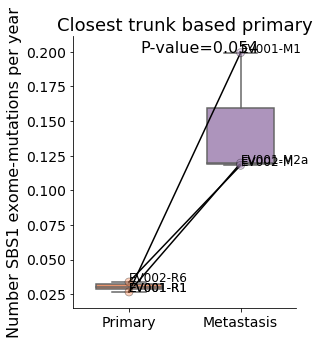

In [51]:
fig,ax=plt.subplots(figsize=(4,5))
sns.boxplot(data=df_s,x="type",y="SBS1_year",showfliers=False,order=["Primary","Metastasis"],palette={"Metastasis":"#af8dc3","Primary":"#fc8d59"},width=0.6,ax=ax)
ax=sns.stripplot(data=df_s,x="type",y="SBS1_year",order=["Primary","Metastasis"],palette={"Metastasis":"#af8dc3","Primary":"#fc8d59"},edgecolor="black",linewidth=0.7,s=8,alpha=0.4,ax=ax,jitter=False)
pr_vs,mets_vs=[],[]
for pat in ["EV001","EV002"]:
    # make it paired
    tmp=df_s[df_s["sample_id"]==pat]
    mets= tmp[tmp["type"]=="Metastasis"][["sample_id","sample_id_region"]].drop_duplicates()
    primaries= tmp[(tmp["type"]=="Primary")&(tmp["is_trunk_closest"])][["sample_id","sample_id_region"]].drop_duplicates()
    s1=primaries[primaries["sample_id"]==pat]["sample_id_region"]
    s2=mets[mets["sample_id"]==pat]["sample_id_region"]
    unique_combinations = list(product(s1,s2))
    for pr,met in unique_combinations:
        pr_v=df_kd[(df_kd["sample_id"]==pat)&(df_kd["sample_id_region"]==pr)]["SBS1_year"].values[0]
        met_v=df_kd[(df_kd["sample_id"]==pat)&(df_kd["sample_id_region"]==met)]["SBS1_year"].values[0]
        pr_vs.append(pr_v)
        mets_vs.append(met_v)
        ax.plot([0,1.],[pr_v,met_v],color="black")
        ax.annotate(xy=(0,pr_v),s=pat+"-"+pr,fontsize=12)
        ax.annotate(xy=(1,met_v),s=pat+"-"+met,fontsize=12)
_,p=st.ttest_rel(pr_vs,mets_vs)
print (p)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel("")
ax.set_ylabel("Number SBS1 exome-mutations per year",fontsize=16)
#ax.set_ylim(4,18)
ax.set_title("Closest trunk based primary",fontsize=18)
ax.annotate(xy=(0.1,np.nanmax([pr_vs,mets_vs])),s=f"P-value={p:1.3f}",fontsize=16)

plt.savefig(f'../results/figures/kidney_paired_biopsies_muts_per_year.pdf', dpi=800,bbox_inches="tight")

##### Calculate relative enrichment of SBS1

##### EVO1

In [52]:
cols_b={"EV001":["M1","M2a","R1","R2","R3","R4","R5","R8","R9"],"EV002":["M","R1","R3","R4","R6","R7","R9"]}
# EV001
cols = cols_b["EV001"]
is_tree_mut = np.sum(evo1[cols],axis=1)>6
is_tree_sbs1_mut = np.sum(evo1[evo1["SBS1"]==True][cols],axis=1)>6
# primar only
evo1["is_primary_only"] = evo1.apply(lambda r: (r["M1"]+r["M2a"])==0 and (r["R1"]+r["R2"]+r["R3"]+r["R4"]+r["R5"]+r["R8"]+r["R9"] >4),axis=1)
is_primary_only_mut = evo1[evo1["is_primary_only"]].shape[0]
is_primary_only_sbs1_mut = evo1[(evo1["is_primary_only"])&(evo1["SBS1"]==True)].shape[0]
# met only
evo1["is_met_only"] = evo1.apply(lambda r: (r["M1"]+r["M2a"])>0 and (r["R1"]+r["R2"]+r["R3"]+r["R4"]+r["R5"]+r["R8"]+r["R9"]) == 0,axis=1)
is_met_only_mut = evo1[evo1["is_met_only"]].shape[0]
is_met_only_sbs1_mut = evo1[(evo1["is_met_only"])&(evo1["SBS1"]==True)].shape[0]

print (sum(is_tree_sbs1_mut)/sum(is_tree_mut),is_met_only_sbs1_mut/is_met_only_mut)



0.021052631578947368 0.0625


##### EVO2

In [53]:
cols_b={"EV001":["M1","M2a","R1","R2","R3","R4","R5","R8","R9"],"EV002":["M","R1","R3","R4","R6","R7","R9"]}
# EV001
cols = cols_b["EV002"]
is_tree_mut_2 = np.sum(evo2[cols],axis=1)>5
is_tree_sbs1_mut_2 = np.sum(evo2[evo2["SBS1"]==True][cols],axis=1)>5
# primar only
evo2["is_primary_only"] = evo2.apply(lambda r: (r["M"])==0 and (r["R1"]+r["R3"]+r["R4"]+r["R6"]+r["R7"]+r["R9"] >4),axis=1)
is_primary_only_mut = evo2[evo2["is_primary_only"]].shape[0]
is_primary_only_sbs1_mut = evo2[(evo2["is_primary_only"])&(evo2["SBS1"]==True)].shape[0]
# met only
evo2["is_met_only"] = evo2.apply(lambda r: (r["M"])>0 and ((r["R1"]+r["R3"]+r["R4"]+r["R6"]+r["R7"]+r["R9"]) == 0),axis=1)
is_met_only_mut_2 = evo2[evo2["is_met_only"]].shape[0]
is_met_only_sbs1_mut_2 = evo2[(evo2["is_met_only"])&(evo2["SBS1"]==True)].shape[0]

print (sum(is_tree_sbs1_mut_2)/sum(is_tree_mut_2),is_met_only_sbs1_mut_2/is_met_only_mut_2)



0.02631578947368421 0.05


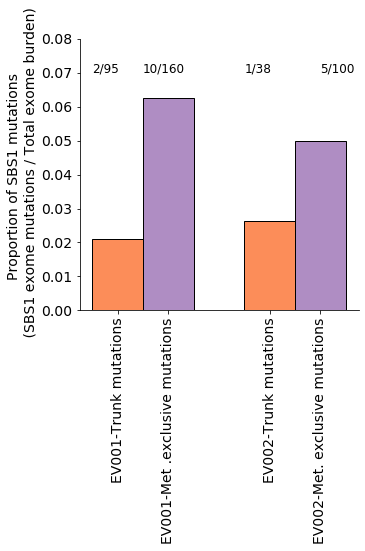

In [54]:
fig, ax = plt.subplots(figsize=(5,5))

ax.bar(x=0,height=sum(is_tree_sbs1_mut)/sum(is_tree_mut),color="#fc8d59",width=0.5,edgecolor="black")
ax.bar(x=0.5,height=is_met_only_sbs1_mut/is_met_only_mut,color="#af8dc3",width=0.5,edgecolor="black")

ax.bar(x=1.5,height=sum(is_tree_sbs1_mut_2)/sum(is_tree_mut_2),color="#fc8d59",width=0.5,edgecolor="black")
ax.bar(x=2.0,height=is_met_only_sbs1_mut_2/is_met_only_mut_2,color="#af8dc3",width=0.5,edgecolor="black")

ax.set_xticks([0,0.5,1.5,2])
ax.set_xticks([0,0.5,1.5,2])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(["EV001-Trunk mutations","EV001-Met .exclusive mutations","EV002-Trunk mutations","EV002-Met. exclusive mutations"],rotation=90)
ax.tick_params(axis='both', which='major', labelsize=14)


ax.annotate(xy=(-0.25,0.07),s=f"{sum(is_tree_sbs1_mut)}/{sum(is_tree_mut)}",fontsize=12)
ax.annotate(xy=(0.25,0.07),s=f"{is_met_only_sbs1_mut}/{is_met_only_mut}",fontsize=12)

ax.annotate(xy=(1.25,0.07),s=f"{sum(is_tree_sbs1_mut_2)}/{sum(is_tree_mut_2)}",fontsize=12)
ax.annotate(xy=(2.0,0.07),s=f"{is_met_only_sbs1_mut_2}/{is_met_only_mut_2}",fontsize=12)


ax.set_ylim(0,0.08)

ax.set_ylabel("Proportion of SBS1 mutations \n (SBS1 exome mutations / Total exome burden)",fontsize=14)

plt.savefig(f'../results/figures/kidney_paired_exclusive_mutations_muts_per_year.pdf', dpi=800,bbox_inches="tight")

##### Independent WES cohorts,  
1. Using TCGA as primary 
2. Using Diana Miao et al. as met 

In [55]:
!cp /home/fran/Documents/cuppen/HPC/tunnel/cuppen/projects/P0025_PCAWG_HMF/drivers/analysis/dna-rep-ann/final-update/external_datasets/kidney_exome//results/r-objects/meta_kid_dfci_with_counts.tsv ../data/diana_miao_sbs1_counts.tsv
!cp /home/fran/Documents/cuppen/HPC/tunnel//cuppen/projects/P0025_PCAWG_HMF/drivers/analysis/dna-rep-ann/final-update/external_datasets/prostate_exome//results/r-objects/tcga_exom/meta_KIRC_tcga_prim_with_counts.tsv ../data/kirc_tcga_sbs1_counts.tsv

/home/fran/miniconda3/envs/global/lib/python3.6/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/fran/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/fran/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Pvalue met  MannwhitneyuResult(statistic=0.0, pvalue=0.0) nan 0.06517240553248185
Pvalue primary  MannwhitneyuResult(statistic=0.0, pvalue=0.0) nan 0.08818195004728649


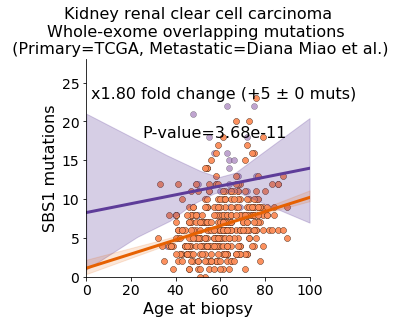

In [12]:
df_dcfi_science_exome = pd.read_csv("../data/diana_miao_sbs1_counts.tsv",sep="\t").rename(columns={"AGE":"age"})
df_dcfi_science_exome["cohort"] = "Hartwig"
df_kirc_tcga_ex = pd.read_csv("../data/kirc_tcga_sbs1_counts.tsv",sep="\t",usecols=["case_submitter_id","age_at_index","sbs1_count","tot_count"]).rename(columns={"age_at_index":"age"})
df_kirc_tcga_ex["cohort"] = "PCAWG"
df_data_exome= pd.concat([df_dcfi_science_exome,df_kirc_tcga_ex])
df_data_exome=df_data_exome[(df_data_exome["sbs1_count"]<40)] # remove hypermutators 
df_data_exome["cancer_type"] = "Kidney renal clear cell carcinoma"
df_data_exome["cancer_type_code"] = "KIRC"
sp,ip, sm,ie, mean_diff_res, std_diff_res, fold_change, std_fold_change, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim=plot_regression_with_independent("Kidney renal clear cell carcinoma","KIRC",df_data_exome,primary_df_independent=pd.DataFrame([],columns=["sbs1_count","age"]),met_df_independent=pd.DataFrame([],columns=["sbs1_count","age"]),name="WES_KIRC_TCGA_DFCI",join=False ,exome=True, title2="Whole-exome overlapping mutations \n (Primary=TCGA, Metastatic=Diana Miao et al.)")
l=[]
l.append(["Kidney renal clear cell carcinoma","KIRC","WES",sp,ip, sm,ie, mean_diff_res, std_diff_res, fold_change, std_fold_change, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim])
df_stats_brca_wes = pd.DataFrame(l,columns=["cancer_type","cancer_type_code","subgroup","slope_primary","intercept_primary","slope_met","intercept_met",
                                  "mean_diff_residual","std_diff_residual","fold_change_met","std_fold_change_met","n_met","n_prim","pvalue",
                                  "pvalue_res_met","rvalue_res_met", "pvalue_res_prim","rvalue_res_prim"])
df_stats_brca_wes.rename(columns={"pvalue":"pvalue_diff_distributions"}).to_csv("../results/results_sbs1_kirc_WES_TCGA_DFCI.tsv",sep="\t",index=False)

### Thyroid cancer

##### Independent WES cohorts
1. Using TCGA as primary 
2. Hartwig (wes downsampled) as met

In [20]:
!cp /home/fran/Documents/cuppen/HPC/tunnel/cuppen/projects/P0025_PCAWG_HMF/drivers/analysis/dna-rep-ann/final-update/external_datasets/prostate_exome/results/r-objects/prim_exom/metadata_included_THCA.tsv ../data/hartwig_wes_thyroid.tsv
!cp /home/fran/Documents/cuppen/HPC/tunnel//cuppen/projects/P0025_PCAWG_HMF/drivers/analysis/dna-rep-ann/final-update/external_datasets/prostate_exome/results/r-objects/tcga_exom/meta_THCA_tcga_prim_with_counts.tsv ../data/thca_tcga_sbs1_counts.tsv

/home/fran/miniconda3/envs/global/lib/python3.6/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/fran/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/fran/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Pvalue met  MannwhitneyuResult(statistic=0.0, pvalue=0.0) nan 0.6750789243768898
Pvalue primary  MannwhitneyuResult(statistic=0.0, pvalue=0.0) nan -0.0004190091156683313


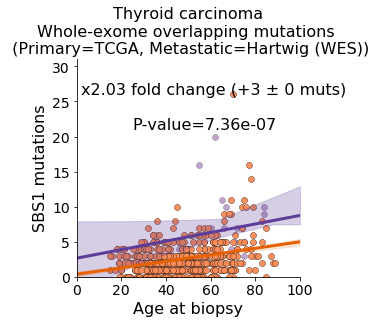

In [15]:
# met dataset
df_data_hmf_exome=pd.read_csv("../data/hartwig_wes_thyroid.tsv",sep="\t")
df_data_hmf_exome=df_data_hmf_exome[(df_data_hmf_exome["sample_id"].isin(df_data[df_data["cohort"]=="Hartwig"]["sample_id"]))][["sample_id","cancer_type","cancer_type_code","sbs1_count","tot_count","age"]].merge(df_meta[["sample_id","cohort"]]).rename(columns={"age_at_biopsy":"age"})
df_data_hmf_exome["cohort"] = "Hartwig"
maxv=1.5*np.nanmax(df_data_hmf_exome["sbs1_count"])
# primary dataset
df_thca_tcga_ex = pd.read_csv("../data/thca_tcga_sbs1_counts.tsv",sep="\t",usecols=["case_submitter_id","age_at_index","sbs1_count","tot_count"]).rename(columns={"age_at_index":"age"})
df_thca_tcga_ex=df_thca_tcga_ex[df_thca_tcga_ex["tot_count"]>0] # remove samples with no mutation info
df_thca_tcga_ex["cohort"] = "PCAWG"
df_data_exome= pd.concat([df_data_hmf_exome,df_thca_tcga_ex])
df_data_exome["cancer_type"] = "Thyroid carcinoma"
df_data_exome["cancer_type_code"] = "THCA"
df_data_exome=df_data_exome[(df_data_exome["sbs1_count"]<=maxv)]
sp,ip, sm,ie, mean_diff_res, std_diff_res, fold_change, std_fold_change, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim=plot_regression_with_independent("Thyroid carcinoma","THCA",df_data_exome,primary_df_independent=pd.DataFrame([],columns=["sbs1_count","age"]),met_df_independent=pd.DataFrame([],columns=["sbs1_count","age"]),name="WES_THCA_TCGA",join=False ,exome=True, title2="Whole-exome overlapping mutations \n (Primary=TCGA, Metastatic=Hartwig (WES))")
l=[]
l.append(["Thyroid carcinoma","THCA","WES",sp,ip, sm,ie, mean_diff_res, std_diff_res, fold_change, std_fold_change, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim])
df_stats_brca_wes = pd.DataFrame(l,columns=["cancer_type","cancer_type_code","subgroup","slope_primary","intercept_primary","slope_met","intercept_met",
                                  "mean_diff_residual","std_diff_residual","fold_change_met","std_fold_change_met","n_met","n_prim","pvalue",
                                  "pvalue_res_met","rvalue_res_met", "pvalue_res_prim","rvalue_res_prim"])
df_stats_brca_wes[columns_subtype].rename(columns={"pvalue":"pvalue_diff_distributions"}).to_csv("../results/results_sbs1_thca_WES_TCGA.tsv",sep="\t",index=False)

### Colorectal carcinoma

##### Independent WES cohorts
1. Using TCGA as primary 
2. Hartwig (wes downsampled) as met

In [64]:
!cp /home/fran/Documents/cuppen/HPC/tunnel/cuppen/projects/P0025_PCAWG_HMF/drivers/analysis/dna-rep-ann/final-update/external_datasets/prostate_exome//results/r-objects/prim_exom/metadata_included_COREAD.tsv ../data/hartwig_wes_coread.tsv
!cp /home/fran/Documents/cuppen/HPC/tunnel//cuppen/projects/P0025_PCAWG_HMF/drivers/analysis/dna-rep-ann/final-update/external_datasets/prostate_exome//results/r-objects/tcga_exom/meta_COREAD_tcga_prim_with_counts.tsv ../data/coread_tcga_sbs1_counts.tsv

/home/fran/miniconda3/envs/global/lib/python3.6/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/fran/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/fran/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Pvalue met  MannwhitneyuResult(statistic=0.0, pvalue=0.0) nan -0.7900691180483554
Pvalue primary  MannwhitneyuResult(statistic=0.0, pvalue=0.0) nan -0.7307971831379741


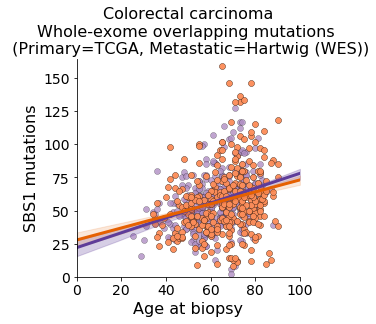

In [16]:
# met dataset
df_data_hmf_exome=pd.read_csv("../data/hartwig_wes_coread.tsv",sep="\t")
df_data_hmf_exome=df_data_hmf_exome[(df_data_hmf_exome["sample_id"].isin(df_data[df_data["cohort"]=="Hartwig"]["sample_id"]))][["sample_id","cancer_type","cancer_type_code","sbs1_count","tot_count","age"]].merge(df_meta[["sample_id","cohort"]]).rename(columns={"age_at_biopsy":"age"})
df_data_hmf_exome["cohort"] = "Hartwig"
maxv=1.5*np.nanmax(df_data_hmf_exome["sbs1_count"])
# primary dataset
df_coread_tcga_ex = pd.read_csv("../data/coread_tcga_sbs1_counts.tsv",sep="\t",usecols=["case_submitter_id","age_at_index","sbs1_count","tot_count"]).rename(columns={"age_at_index":"age"})
df_coread_tcga_ex=df_coread_tcga_ex[df_coread_tcga_ex["tot_count"]>0] # remove samples with no mutation info
df_coread_tcga_ex["cohort"] = "PCAWG"
df_data_exome= pd.concat([df_data_hmf_exome,df_coread_tcga_ex])
df_data_exome["cancer_type"] = "Colorectum carcinoma"
df_data_exome["cancer_type_code"] = "COREAD"
df_data_exome=df_data_exome[(df_data_exome["sbs1_count"]<=maxv)]
sp,ip, sm,ie, mean_diff_res, std_diff_res, fold_change, std_fold_change, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim=plot_regression_with_independent("Colorectal carcinoma","COREAD",df_data_exome,primary_df_independent=pd.DataFrame([],columns=["sbs1_count","age"]),met_df_independent=pd.DataFrame([],columns=["sbs1_count","age"]),name="WES_COREAD_TCGA",join=False ,exome=True, title2="Whole-exome overlapping mutations \n (Primary=TCGA, Metastatic=Hartwig (WES))")
l=[]
l.append(["Colorectal carcinoma","COREAD","WES",sp,ip, sm,ie, mean_diff_res, std_diff_res, fold_change, std_fold_change, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim])
df_stats_brca_wes = pd.DataFrame(l,columns=["cancer_type","cancer_type_code","subgroup","slope_primary","intercept_primary","slope_met","intercept_met",
                                  "mean_diff_residual","std_diff_residual","fold_change_met","std_fold_change_met","n_met","n_prim","pvalue",
                                  "pvalue_res_met","rvalue_res_met", "pvalue_res_prim","rvalue_res_prim"])
df_stats_brca_wes[columns_subtype].rename(columns={"pvalue":"pvalue_diff_distributions"}).to_csv("../results/results_sbs1_coread_WES_TCGA.tsv",sep="\t",index=False)

### Ovarian serous adenocarcinoma

##### Independent WES cohorts
1. Using TCGA as primary 
2. Hartwig (wes downsampled) as met

In [67]:
!cp /home/fran/Documents/cuppen/HPC/tunnel/cuppen/projects/P0025_PCAWG_HMF/drivers/analysis/dna-rep-ann/final-update/external_datasets/prostate_exome/results/r-objects/prim_exom/metadata_included_OV.tsv ../data/hartwig_wes_ov.tsv
!cp /home/fran/Documents/cuppen/HPC/tunnel//cuppen/projects/P0025_PCAWG_HMF/drivers/analysis/dna-rep-ann/final-update/external_datasets/prostate_exome/results/r-objects/tcga_exom/meta_OV_tcga_prim_with_counts.tsv ../data/ov_tcga_sbs1_counts.tsv

In [19]:
pvalue

0.0

/home/fran/miniconda3/envs/global/lib/python3.6/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/fran/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/fran/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Pvalue met  MannwhitneyuResult(statistic=0.0, pvalue=0.0) nan -0.3497187284695737
Pvalue primary  MannwhitneyuResult(statistic=0.0, pvalue=0.0) nan 0.1030335340011231


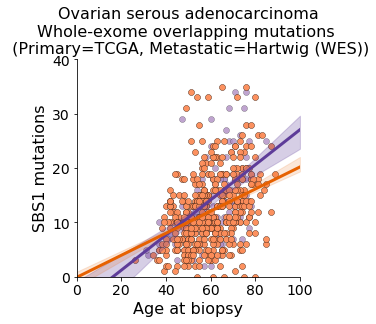

In [17]:
l=[]
# met dataset
df_data_hmf_exome=pd.read_csv("../data/hartwig_wes_ov.tsv",sep="\t")
df_data_hmf_exome=df_data_hmf_exome[(df_data_hmf_exome["sample_id"].isin(df_data[df_data["cohort"]=="Hartwig"]["sample_id"]))][["sample_id","cancer_type","cancer_type_code","sbs1_count","tot_count","age"]].merge(df_meta[["sample_id","cohort"]]).rename(columns={"age_at_biopsy":"age"})
df_data_hmf_exome["cohort"] = "Hartwig"
maxv=1.5*df_data_hmf_exome["sbs1_count"].max()
# primary dataset
df_ov_tcga_ex = pd.read_csv("../data/ov_tcga_sbs1_counts.tsv",sep="\t",usecols=["case_submitter_id","age_at_index","sbs1_count","tot_count"]).rename(columns={"age_at_index":"age"})
df_ov_tcga_ex=df_ov_tcga_ex[df_ov_tcga_ex["tot_count"]>0] # remove samples with no mutation info
df_ov_tcga_ex["cohort"] = "PCAWG"
df_data_exome= pd.concat([df_data_hmf_exome,df_ov_tcga_ex])
df_data_exome["cancer_type"] = "Ovarian cancer"
df_data_exome["cancer_type_code"] = "OV"
df_data_exome=df_data_exome[(df_data_exome["sbs1_count"]<=maxv)]
sp,ip, sm,ie, mean_diff_res, std_diff_res, fold_change, std_fold_change, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim=plot_regression_with_independent("Ovarian serous adenocarcinoma","OV",df_data_exome,primary_df_independent=pd.DataFrame([],columns=["sbs1_count","age"]),met_df_independent=pd.DataFrame([],columns=["sbs1_count","age"]),name="WES_OV_TCGA",join=False ,exome=True, title2="Whole-exome overlapping mutations \n (Primary=TCGA, Metastatic=Hartwig (WES))")
l=[]
l.append(["Ovarian serous adenocarcinoma","OV","WES",sp,ip, sm,ie, mean_diff_res, std_diff_res, fold_change, std_fold_change, n_met, n_prim, pvalue, pvalue_met,r_met,pvalue_prim,r_prim])

df_stats_brca_wes = pd.DataFrame(l,columns=["cancer_type","cancer_type_code","subgroup","slope_primary","intercept_primary","slope_met","intercept_met",
                                  "mean_diff_residual","std_diff_residual","fold_change_met","std_fold_change_met","n_met","n_prim","pvalue",
                                  "pvalue_res_met","rvalue_res_met", "pvalue_res_prim","rvalue_res_prim"])
df_stats_brca_wes[columns_subtype].rename(columns={"pvalue":"pvalue_diff_distributions"}).to_csv("../results/results_sbs1_ov_WES_TCGA.tsv",sep="\t",index=False)

# Analysis by metastatic location

##### Distant mets

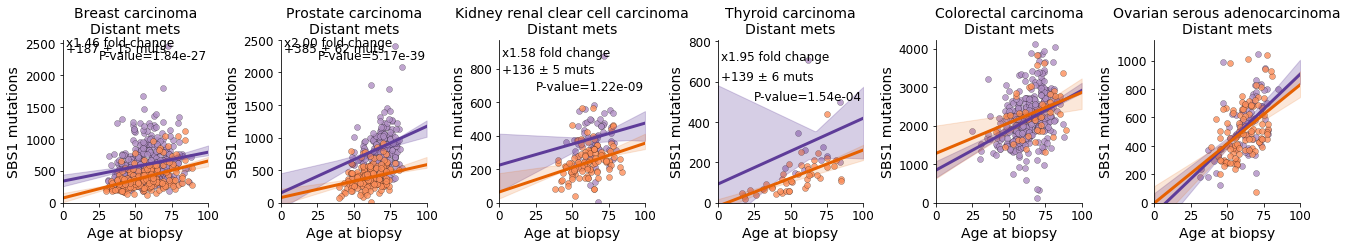

In [27]:
ttypes_selected=["Breast carcinoma", "Prostate carcinoma","Kidney renal clear cell carcinoma", "Thyroid carcinoma",
                          "Colorectal carcinoma","Ovarian serous adenocarcinoma"]
d_diff,df_stats_distant=plot_regression_combined(df_data[((df_data["metastatic_location"]=="Distant")&(df_data["cohort"]=="Hartwig"))|(df_data["cohort"]=="PCAWG")],name="distant_mets",title2="Distant mets",ttypes=ttypes_selected)

##### Local mets

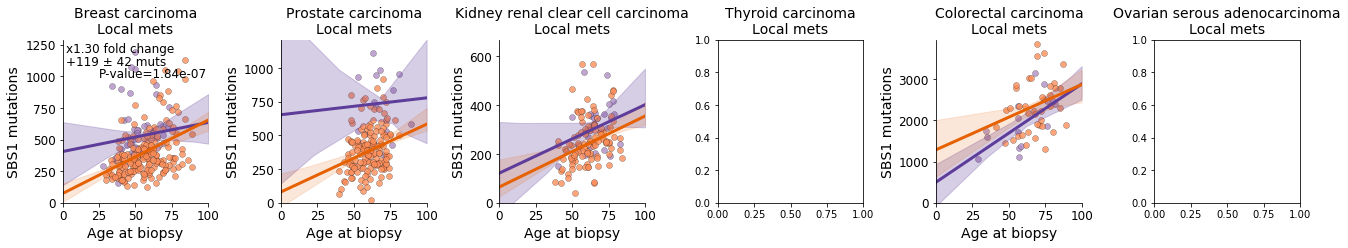

In [28]:
d_diff,df_stats_local=plot_regression_combined(df_data[((df_data["metastatic_location"]=="Local")&(df_data["cohort"]=="Hartwig"))|(df_data["cohort"]=="PCAWG")],name="local_mets",title2="Local mets",ttypes=ttypes_selected)

In [110]:
df_stats[(df_stats["rvalue_res_met"]>0.1)&(df_stats["rvalue_res_prim"]>0.1)].shape

(15, 19)

##### Lymph node mets

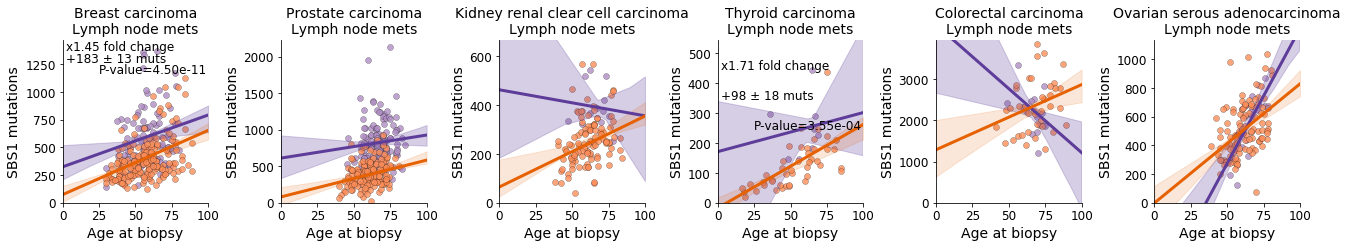

In [29]:
d_diff,df_stats_lymph=plot_regression_combined(df_data[((df_data["metastatic_location"]=="Lymph")&(df_data["cohort"]=="Hartwig"))|(df_data["cohort"]=="PCAWG")],name="lymph_mets",title2="Lymph node mets",ttypes=ttypes_selected)

# Analysis of clonality and timing of SBS1 and SBS5 mutations (Extended Data Fig. 4 and Supp. Note 3)

In [7]:
sbs1_clonality = pd.read_csv("../data/sbs1_sbs5_counts.tsv",sep="\t").merge(df_meta)

##### Clonality ratio of selected cancer types Figure 3d-e

PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=1.888e-04 U_stat=9.130e+04
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=4.488e-01 U_stat=1.618e+04
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=5.399e-01 U_stat=5.442e+03
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=6.516e-11 U_stat=4.084e+04


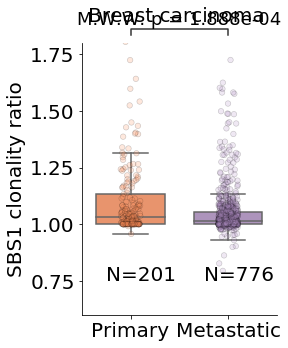

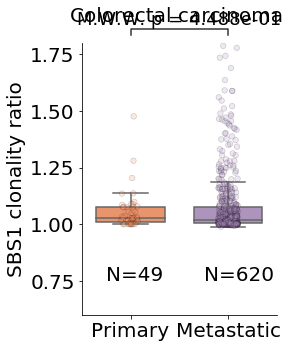

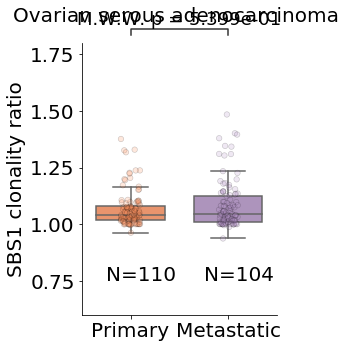

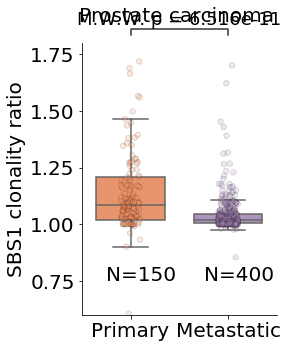

In [8]:
tt=['Breast carcinoma',
 'Prostate carcinoma',
 'Colorectal carcinoma',
 'Ovarian serous adenocarcinoma']
for i,r in df_stats[df_stats["cancer_type"].isin(tt)][["cancer_type","cancer_type_code","n_met","n_prim"]].drop_duplicates().iterrows():
    
    fig,ax = plt.subplots(figsize=(3.5,5))
    gs = gridspec.GridSpec(figure=fig, ncols=1, nrows=1)
    gs.update(hspace=0, wspace=0.4)
    ax = plt.subplot(gs[0])
    # first clonality
    m=sbs1_clonality[sbs1_clonality["cancer_type_code"]==r["cancer_type_code"]]
    ttype=r["cancer_type_code"]
    ax.set_ylim(0.6,1.8)
    
    sns.boxplot(showfliers=False,ax=ax,data=m,x="cohort",y="sbs1_clonality_ratio",order=["PCAWG","Hartwig"],palette={"Hartwig":"#af8dc3","PCAWG":"#fc8d59"},width=0.7)
    sns.stripplot(ax=ax,data=m,x="cohort",y="sbs1_clonality_ratio",order=["PCAWG","Hartwig"],palette={"Hartwig":"#af8dc3","PCAWG":"#fc8d59"},edgecolor="black",linewidth=0.6,s=5.5,alpha=0.2)
    
    test_results = add_stat_annotation(ax, data=m, x="cohort", y="sbs1_clonality_ratio", order=["PCAWG","Hartwig"],
                                       box_pairs=[("Hartwig","PCAWG")],comparisons_correction=None,
                                       test='Mann-Whitney', text_format='full',
                                       loc='outside', verbose=2,fontsize=18)
    #ax.axhline(y=1,ls="--",color="grey")
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("SBS1 clonality ratio",fontsize=20)
    #ax.set_title(r["cancer_type"],fontsize=14)
    ax.set_xticklabels(["Primary","Metastatic"])
    fig.suptitle(r["cancer_type"],fontsize=20)
    d=sbs1_clonality[(sbs1_clonality["cancer_type_code"]==r["cancer_type_code"])&(np.isfinite(sbs1_clonality["sbs1_clonality_ratio"]))]["cohort"].value_counts()
    
    ax.annotate(xy=(-0.25,0.75),s=f"N={d['PCAWG']}",fontsize=20)
    ax.annotate(xy=(0.75,0.75),s=f"N={d['Hartwig']}",fontsize=20)
    plt.savefig(f'../results/figures/clonality_SBS1/sbs1_combined_{ttype}.pdf', dpi=800,bbox_inches="tight")
    
    
    

##### Extended Data Fig. 4e

PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=4.571e-01 U_stat=6.344e+03
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=3.444e-05 U_stat=7.890e+02


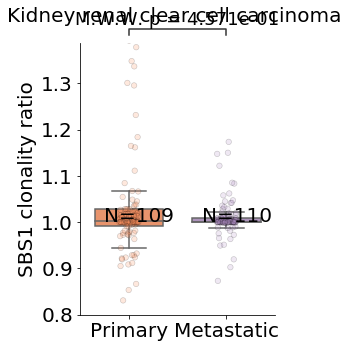

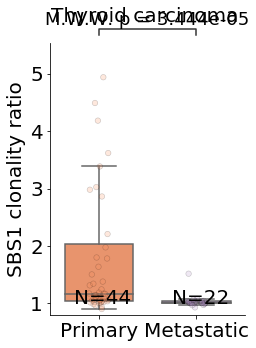

In [74]:
tt=[
 'Kidney renal clear cell carcinoma',
 'Thyroid carcinoma' ]
for i,r in df_stats[df_stats["cancer_type"].isin(tt)][["cancer_type","cancer_type_code"]].drop_duplicates().iterrows():
    
    fig,ax = plt.subplots(figsize=(3.5,5))
    gs = gridspec.GridSpec(figure=fig, ncols=1, nrows=1)
    gs.update(hspace=0, wspace=0.4)
    ax = plt.subplot(gs[0])
    # first clonality
    m=sbs1_clonality[sbs1_clonality["cancer_type_code"]==r["cancer_type_code"]]
    ttype=r["cancer_type_code"]
    ax.set_ylim(0.8,np.nanpercentile(m["sbs1_clonality_ratio"],98))
    
    sns.boxplot(showfliers=False,ax=ax,data=m,x="cohort",y="sbs1_clonality_ratio",order=["PCAWG","Hartwig"],palette={"Hartwig":"#af8dc3","PCAWG":"#fc8d59"},width=0.7)
    sns.stripplot(ax=ax,data=m,x="cohort",y="sbs1_clonality_ratio",order=["PCAWG","Hartwig"],palette={"Hartwig":"#af8dc3","PCAWG":"#fc8d59"},edgecolor="black",linewidth=0.6,s=5.5,alpha=0.2)
    
    test_results = add_stat_annotation(ax, data=m, x="cohort", y="sbs1_clonality_ratio", order=["PCAWG","Hartwig"],
                                       box_pairs=[("Hartwig","PCAWG")],comparisons_correction=None,
                                       test='Mann-Whitney', text_format='full',
                                       loc='outside', verbose=2,fontsize=18)
    #ax.axhline(y=1,ls="--",color="grey")
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("SBS1 clonality ratio",fontsize=20)
    #ax.set_title(r["cancer_type"],fontsize=14)
    ax.set_xticklabels(["Primary","Metastatic"])
    fig.suptitle(r["cancer_type"],fontsize=20)
    d=sbs1_clonality[(sbs1_clonality["cancer_type_code"]==r["cancer_type_code"])&(np.isfinite(sbs1_clonality["sbs1_clonality_ratio"]))]["cohort"].value_counts()
    ax.annotate(xy=(-0.25,1.),s=f"N={d['PCAWG']}",fontsize=20)
    ax.annotate(xy=(0.75,1.),s=f"N={d['Hartwig']}",fontsize=20)
    plt.savefig(f'../results/figures/clonality_SBS1/sbs1_combined_{ttype}.pdf', dpi=800,bbox_inches="tight")
    
    
    

##### Visualize all together for Supp. Note 3

PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=1.888e-04 U_stat=9.130e+04
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=6.516e-11 U_stat=4.084e+04
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=4.571e-01 U_stat=6.344e+03
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=3.444e-05 U_stat=7.890e+02
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=4.488e-01 U_stat=1.618e+04
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=5.399e-01 U_stat=5.442e+03


/home/fran/miniconda3/envs/global/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


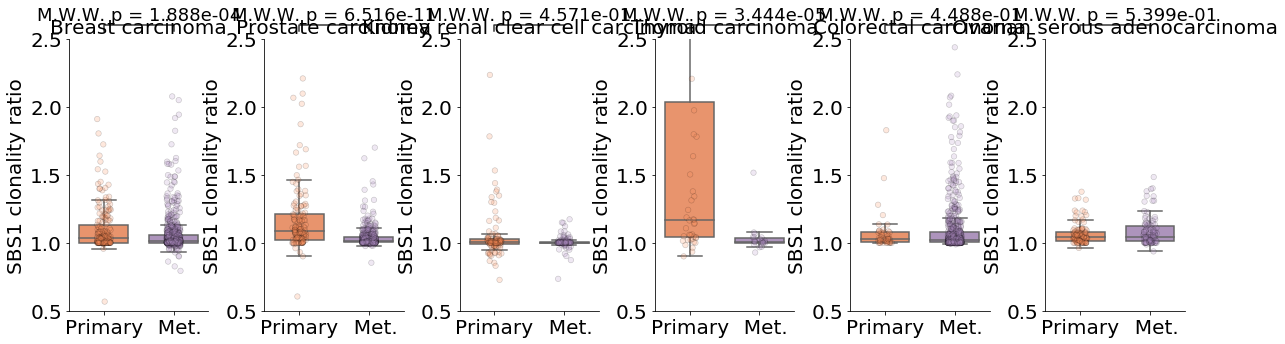

In [75]:
tt=['Breast carcinoma',
 'Prostate carcinoma',
 'Kidney renal clear cell carcinoma',
 'Thyroid carcinoma',
 'Colorectal carcinoma',
 'Ovarian serous adenocarcinoma']
i=0
fig,ax = plt.subplots(figsize=(4*5,5))
gs = gridspec.GridSpec(figure=fig, ncols=6, nrows=1)
for _,r in df_stats[df_stats["cancer_type"].isin(tt)][["cancer_type","cancer_type_code"]].drop_duplicates().iterrows():
   
    gs.update(hspace=0, wspace=0.4)
    ax = plt.subplot(gs[i])
    ax.set_ylim(0.5,2.5)
    # first clonality
    m=sbs1_clonality[sbs1_clonality["cancer_type"]==tt[i]]
    ttype=m["cancer_type_code"].values[0]
    
    
    sns.boxplot(showfliers=False,ax=ax,data=m,x="cohort",y="sbs1_clonality_ratio",order=["PCAWG","Hartwig"],palette={"Hartwig":"#af8dc3","PCAWG":"#fc8d59"},width=0.7)
    sns.stripplot(ax=ax,data=m,x="cohort",y="sbs1_clonality_ratio",order=["PCAWG","Hartwig"],palette={"Hartwig":"#af8dc3","PCAWG":"#fc8d59"},edgecolor="black",linewidth=0.6,s=5.5,alpha=0.2)
    
    test_results = add_stat_annotation(ax, data=m, x="cohort", y="sbs1_clonality_ratio", order=["PCAWG","Hartwig"],
                                       box_pairs=[("Hartwig","PCAWG")],comparisons_correction=None,
                                       test='Mann-Whitney', text_format='full',
                                       loc='outside', verbose=2,fontsize=18)
    #ax.axhline(y=1,ls="--",color="grey")
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("SBS1 clonality ratio",fontsize=20)
    #ax.set_title(r["cancer_type"],fontsize=14)
    ax.set_xticklabels(["Primary","  Met."])
    ax.set_title(tt[i],fontsize=20)
    ax.set_ylim(0.5,2.5)
    i+=1
fig.tight_layout()
#fig.subplots_adjust(top=0.9) 
plt.savefig(f'../results/figures/clonality_SBS1/sbs1_combined_clonality.pdf', dpi=800,bbox_inches="tight")
    
    
    

##### SBS5/SBS40 clonality (Extended Data Fig. 4f)

PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=6.410e-10 U_stat=3.512e+04
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=9.572e-01 U_stat=2.773e+04
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=1.202e-01 U_stat=5.020e+03
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=7.600e-01 U_stat=2.810e+02
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=2.312e-06 U_stat=7.027e+03
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=8.493e-01 U_stat=3.743e+03


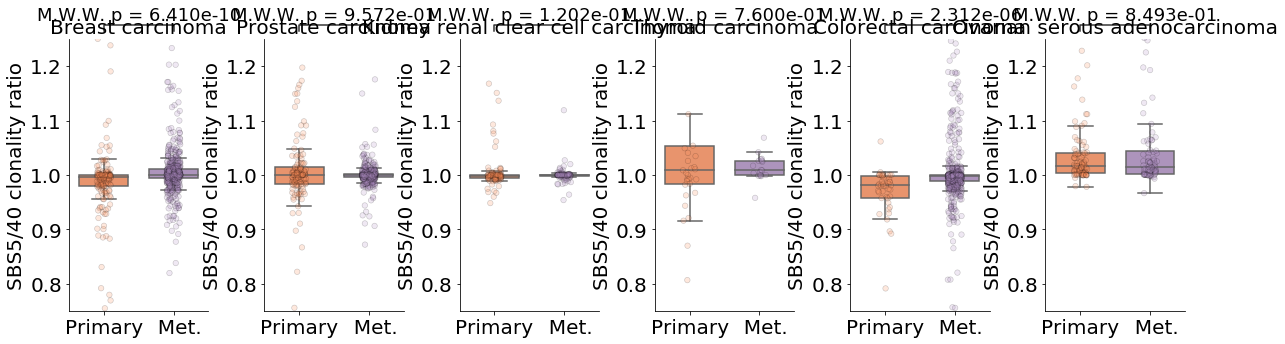

In [9]:
tt=['Breast carcinoma',
 'Prostate carcinoma',
 'Kidney renal clear cell carcinoma',
 'Thyroid carcinoma',
 'Colorectal carcinoma',
 'Ovarian serous adenocarcinoma']
i=0
fig,ax = plt.subplots(figsize=(4*5,5))
gs = gridspec.GridSpec(figure=fig, ncols=6, nrows=1)
for _,r in df_stats[df_stats["cancer_type"].isin(tt)][["cancer_type","cancer_type_code"]].drop_duplicates().iterrows():
   
    gs.update(hspace=0, wspace=0.4)
    ax = plt.subplot(gs[i])
    # first clonality
    m=sbs1_clonality[sbs1_clonality["cancer_type"]==tt[i]]
    ttype=m["cancer_type_code"].values[0]
    ax.set_ylim(0.75,1.25)
    
    sns.boxplot(showfliers=False,ax=ax,data=m,x="cohort",y="sbs5/40_clonality_ratio",order=["PCAWG","Hartwig"],palette={"Hartwig":"#af8dc3","PCAWG":"#fc8d59"},width=0.7)
    sns.stripplot(ax=ax,data=m,x="cohort",y="sbs5/40_clonality_ratio",order=["PCAWG","Hartwig"],palette={"Hartwig":"#af8dc3","PCAWG":"#fc8d59"},edgecolor="black",linewidth=0.6,s=5.5,alpha=0.2)
    
    test_results = add_stat_annotation(ax, data=m, x="cohort", y="sbs5/40_clonality_ratio", order=["PCAWG","Hartwig"],
                                       box_pairs=[("Hartwig","PCAWG")],comparisons_correction=None,
                                       test='Mann-Whitney', text_format='full',
                                       loc='outside', verbose=2,fontsize=18)
    #ax.axhline(y=1,ls="--",color="grey")
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("SBS5/40 clonality ratio",fontsize=20)
    #ax.set_title(r["cancer_type"],fontsize=14)
    ax.set_xticklabels(["Primary","  Met."])
    ax.set_title(tt[i],fontsize=20)
    i+=1
plt.savefig(f'../results/figures/clonality_SBS5/sbs5_combined_clonality.pdf', dpi=800,bbox_inches="tight")
    
    
    

##### SBS1 clonal late ratios, Supp. Note 3

PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=1.110e-04 U_stat=3.392e+04
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=5.784e-03 U_stat=4.475e+03
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=2.024e-03 U_stat=1.334e+03
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=1.021e-01 U_stat=4.950e+01
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=1.307e-02 U_stat=1.160e+04
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=2.991e-01 U_stat=4.846e+03


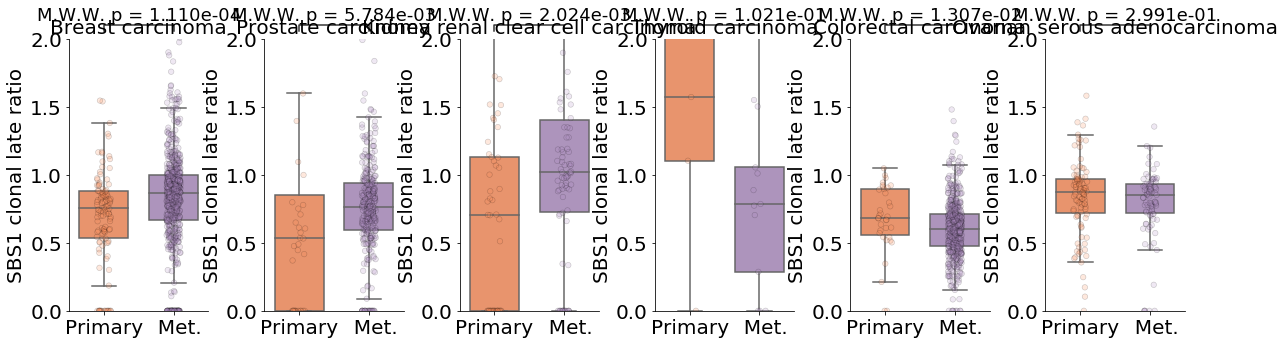

In [159]:
tt=['Breast carcinoma',
 'Prostate carcinoma',
 'Kidney renal clear cell carcinoma',
 'Thyroid carcinoma',
 'Colorectal carcinoma',
 'Ovarian serous adenocarcinoma']
i=0
fig,ax = plt.subplots(figsize=(4*5,5))
gs = gridspec.GridSpec(figure=fig, ncols=6, nrows=1)
for _,r in df_stats[df_stats["cancer_type"].isin(tt)][["cancer_type","cancer_type_code"]].drop_duplicates().iterrows():
   
    gs.update(hspace=0, wspace=0.4)
    ax = plt.subplot(gs[i])
    # first clonality
    m=sbs1_clonality[(sbs1_clonality["cancer_type"]==tt[i])]
    ttype=m["cancer_type_code"].values[0]
    ax.set_ylim(0.0,2.0)
    
    sns.boxplot(showfliers=False,ax=ax,data=m,x="cohort",y="sbs1_clonal_late_ratio",order=["PCAWG","Hartwig"],palette={"Hartwig":"#af8dc3","PCAWG":"#fc8d59"},width=0.7)
    sns.stripplot(ax=ax,data=m,x="cohort",y="sbs1_clonal_late_ratio",order=["PCAWG","Hartwig"],palette={"Hartwig":"#af8dc3","PCAWG":"#fc8d59"},edgecolor="black",linewidth=0.6,s=5.5,alpha=0.2)
    
    test_results = add_stat_annotation(ax, data=m, x="cohort", y="sbs1_clonal_late_ratio", order=["PCAWG","Hartwig"],
                                       box_pairs=[("Hartwig","PCAWG")],comparisons_correction=None,
                                       test='Mann-Whitney', text_format='full',
                                       loc='outside', verbose=2,fontsize=18)
    #ax.axhline(y=1,ls="--",color="grey")
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("SBS1 clonal late ratio",fontsize=20)
    #ax.set_title(r["cancer_type"],fontsize=14)
    ax.set_xticklabels(["Primary","  Met."])
    ax.set_title(tt[i],fontsize=20)
    i+=1
plt.savefig(f'../results/figures/clonality_SBS1/sbs1_combined_clonal_late.pdf', dpi=800,bbox_inches="tight")
    
    
    

##### SBS5 clonal late ratios, Supp. Note 3

PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=6.836e-02 U_stat=2.003e+04
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=8.104e-01 U_stat=5.237e+03
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=9.039e-02 U_stat=1.656e+03
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=7.432e-01 U_stat=2.500e+01
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=3.103e-02 U_stat=7.710e+03
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=2.223e-01 U_stat=3.353e+03


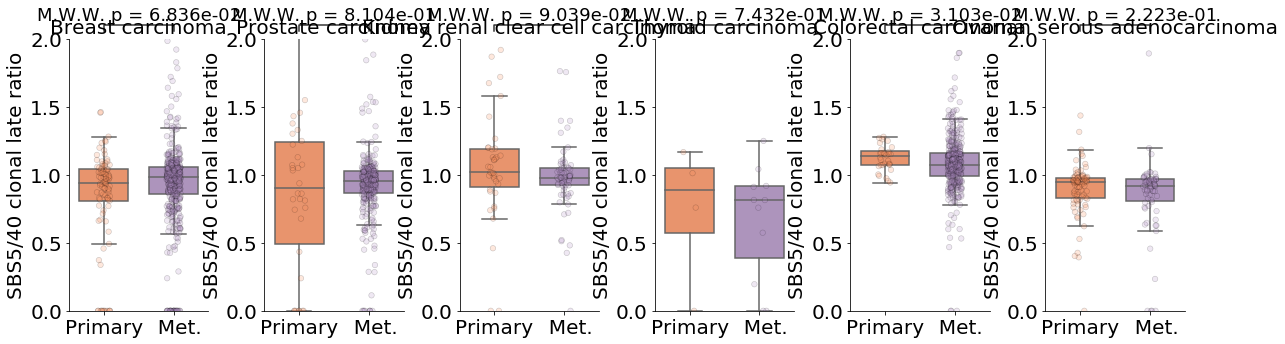

In [10]:
tt=['Breast carcinoma',
 'Prostate carcinoma',
 'Kidney renal clear cell carcinoma',
 'Thyroid carcinoma',
 'Colorectal carcinoma',
 'Ovarian serous adenocarcinoma']
i=0
fig,ax = plt.subplots(figsize=(4*5,5))
gs = gridspec.GridSpec(figure=fig, ncols=6, nrows=1)
for _,r in df_stats[df_stats["cancer_type"].isin(tt)][["cancer_type","cancer_type_code"]].drop_duplicates().iterrows():
   
    gs.update(hspace=0, wspace=0.4)
    ax = plt.subplot(gs[i])
    # first clonality
    m=sbs1_clonality[(sbs1_clonality["cancer_type"]==tt[i])]
    ttype=m["cancer_type_code"].values[0]
    ax.set_ylim(0.0,2.0)
    
    sns.boxplot(showfliers=False,ax=ax,data=m,x="cohort",y="sbs5/40_clonal_late_ratio",order=["PCAWG","Hartwig"],palette={"Hartwig":"#af8dc3","PCAWG":"#fc8d59"},width=0.7)
    sns.stripplot(ax=ax,data=m,x="cohort",y="sbs5/40_clonal_late_ratio",order=["PCAWG","Hartwig"],palette={"Hartwig":"#af8dc3","PCAWG":"#fc8d59"},edgecolor="black",linewidth=0.6,s=5.5,alpha=0.2)
    
    test_results = add_stat_annotation(ax, data=m, x="cohort", y="sbs5/40_clonal_late_ratio", order=["PCAWG","Hartwig"],
                                       box_pairs=[("Hartwig","PCAWG")],comparisons_correction=None,
                                       test='Mann-Whitney', text_format='full',
                                       loc='outside', verbose=2,fontsize=18)
    #ax.axhline(y=1,ls="--",color="grey")
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("SBS5/40 clonal late ratio",fontsize=20)
    #ax.set_title(r["cancer_type"],fontsize=14)
    ax.set_xticklabels(["Primary","  Met."])
    ax.set_title(tt[i],fontsize=20)
    i+=1
plt.savefig(f'../results/figures/clonality_SBS5/sbs5_combined_clonal_late.pdf', dpi=800,bbox_inches="tight")
    
    
    

### Supp-Note 3, using only regions with copy number >= 2 and minor != 1

PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=6.822e-03 U_stat=2.666e+04
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=1.592e-01 U_stat=7.590e+02
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=9.513e-01 U_stat=6.060e+02
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=2.531e-04 U_stat=1.403e+04
PCAWG v.s. Hartwig: Mann-Whitney-Wilcoxon test two-sided, P_val=1.519e-01 U_stat=4.235e+03


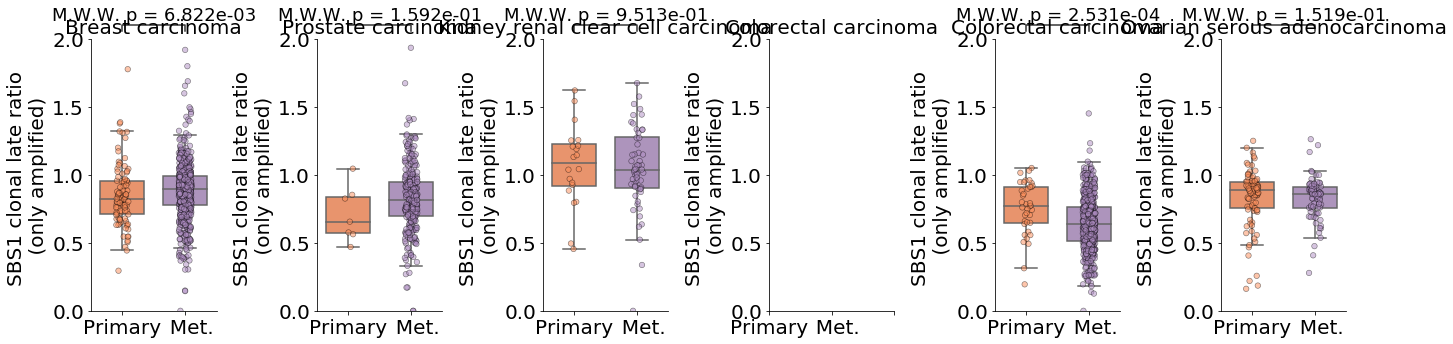

In [11]:
tt=['Breast carcinoma',
 'Prostate carcinoma',
 'Kidney renal clear cell carcinoma',
 'Thyroid carcinoma',
 'Colorectal carcinoma',
 'Ovarian serous adenocarcinoma']
i=0
fig,ax = plt.subplots(figsize=(4.5*5,5))
gs = gridspec.GridSpec(figure=fig, ncols=6, nrows=1)
gs.update(hspace=0, wspace=0.8)
for _,r in df_stats[df_stats["cancer_type"].isin(tt)][["cancer_type","cancer_type_code"]].drop_duplicates().iterrows():
   
    
    ax = plt.subplot(gs[i])
    # first clonality
    m=sbs1_clonality[(sbs1_clonality["cancer_type"]==tt[i])&((sbs1_clonality["clonal_late_minor_major_sbs1"]+sbs1_clonality["clonal_early_minor_major_sbs1"])>4)]
    ttype=m["cancer_type_code"].values[0]
    ax.set_ylim(0.0,2.0)
    if m[m["cohort"]=="PCAWG"].shape[0] < 5:
        i+=1
        ax.spines['top'].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=20)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel("")
        ax.set_ylabel("SBS1 clonal late ratio \n (only amplified) ",fontsize=20)
        ax.set_title(tt[i],fontsize=20)
        ax.set_xticklabels(["Primary","  Met."])
        continue
        
    sns.boxplot(showfliers=False,ax=ax,data=m,x="cohort",y="sbs1_clonal_late_ratio_amp",order=["PCAWG","Hartwig"],palette={"Hartwig":"#af8dc3","PCAWG":"#fc8d59"},width=0.7)
    sns.stripplot(ax=ax,data=m,x="cohort",y="sbs1_clonal_late_ratio_amp",order=["PCAWG","Hartwig"],palette={"Hartwig":"#af8dc3","PCAWG":"#fc8d59"},edgecolor="black",linewidth=0.6,s=5.5,alpha=0.5)
    
    test_results = add_stat_annotation(ax, data=m, x="cohort", y="sbs1_clonal_late_ratio_amp", order=["PCAWG","Hartwig"],
                                       box_pairs=[("Hartwig","PCAWG")],comparisons_correction=None,
                                       test='Mann-Whitney', text_format='full',
                                       loc='outside', verbose=2,fontsize=18)
    #ax.axhline(y=1,ls="--",color="grey")
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("SBS1 clonal late ratio \n (only amplified) ",fontsize=20)
    ax.set_title(tt[i],fontsize=20)
    ax.set_xticklabels(["Primary","  Met."])
    
    i+=1
plt.savefig(f'../results/figures/clonality_SBS1/sbs1_combined_clonal_late_minor_major_adj.pdf', dpi=800,bbox_inches="tight")
    
    
    

# Compare primary SBS1 mutation rate with enrichment in metastatic SBS1 mutation rate

In [85]:
!ls -all ../results/results_sbs1_general.tsv

-rw-rw-r-- 1 fran fran 6659 dic  5 10:45 ../results/results_sbs1_general.tsv


In [100]:
df_stats = pd.read_csv("../results/results_sbs1_general.tsv",sep="\t")
df_data["sbs1_per_year"]  = df_data["sbs1_count"] / df_data["age"] 

In [101]:
v=df_data.groupby(["cancer_type","cohort"],as_index=False).agg(median_sbs1_y=("sbs1_per_year",np.nanmedian),sbs1_95=("sbs1_per_year",ci95),sbs1_5=("sbs1_per_year",ci5))
pm=v[v["cohort"]=="PCAWG"]
pm_s=pm.merge(df_stats[(df_stats["rvalue_res_met"]>0.1)&(df_stats["rvalue_res_prim"]>0.1)][["cancer_type","fold_change_met","std_fold_change_met","mean_diff_residual","median_offset_ages"]])

##### Extended Data Fig. 4 h

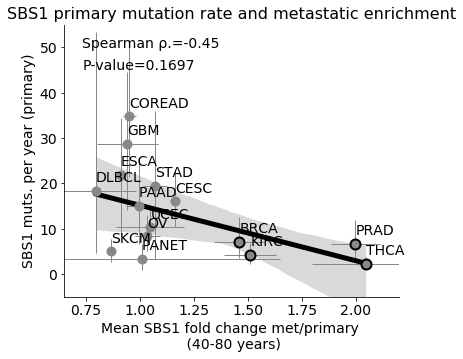

In [102]:
df_stats["log_fc"] = np.log2(df_stats["fold_change_met"])
slope,intercept,rvalue,pvalue,pm_s=cell_division_rate_increase(df_stats,df_data,title="SBS1 primary mutation rate and metastatic enrichment",name="SBS1_load_vs_diff_met_foldchange_err",column_x="fold_change_met",xerr=True,xlim=(0.65,2.2),xlabel="Mean SBS1 fold change met/primary \n (40-80 years)",type_x="fold_change",pearson=False)
pm_s[["cancer_type","cancer_type_code","median_sbs1_y","sbs1_5","sbs1_95","fold_change_met","std_fold_change_met"]].rename(columns={"median_sbs1_y":"mean_primary_sbs1_yburden",
                                                                                                                                    "sbs1_95":"per95_primary_sbs1_yburden",
                                                                                                                                    "sbs1_5":"per5_primary_sbs1_yburden"}).to_csv("../results/primary_turnover_vs_met.tsv",sep="\t")

##### Extended Data Fig. 4 i

In [103]:
sbs_ale = pd.read_excel("../data/sbs1_alexandrov.xlsx")
summ=sbs_ale[sbs_ale["cancer_type_code"]!="Other"].groupby("cancer_type_code",as_index=False).agg({"Signature 1":np.nanmean}).rename(columns={"Signature 1":"SBS1_perGBS_Alexandrov"})
summ["SBS1_genome_wide"] = summ["SBS1_perGBS_Alexandrov"]*3.0

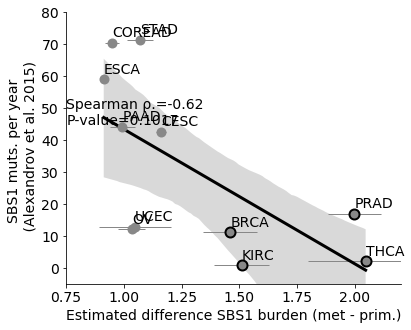

In [104]:
slope,intercept,rvalue,pvalue,pm_s=cell_division_rate_increase_external(df_stats,summ,name="alexandrov_fc",column_x="fold_change_met",xlim=(0.75,2.2),xerr=True,std_x="std_fold_change_met",pearson=False)
pm_s[["cancer_type","cancer_type_code","median_sbs1_y","fold_change_met","std_fold_change_met"]].rename(columns={"median_sbs1_y":"mean_primary_sbs1_yburden",
                                                                                                                                    "sbs1_95":"per95_primary_sbs1_yburden",
                                                                                                                                    "sbs1_5":"per5_primary_sbs1_yburden"}).to_csv("../results/primary_turnover_vs_met_alexandrov.tsv",sep="\t")

### Plot mutation rate SBS1 normalized by SBS5/SBS40 (response to reviewers)

In [14]:
df_data=df_data.merge(df_meta[["sample_id","sbs_load"]])
df_data["sbs1_mutrate"] = df_data["sbs1_count"] / df_data["sbs_load"]
df_data["sbs1_mutrate_age"] = df_data["sbs1_count"] / (df_data["sbs5/40_count"]+df_data["sbs1_count"])

Prostate carcinoma_Hartwig v.s. Prostate carcinoma_PCAWG: Mann-Whitney-Wilcoxon test two-sided, P_val=1.804e-09 U_stat=3.539e+04
Breast carcinoma_Hartwig v.s. Breast carcinoma_PCAWG: Mann-Whitney-Wilcoxon test two-sided, P_val=1.026e-07 U_stat=7.086e+04
Kidney renal clear cell carcinoma_Hartwig v.s. Kidney renal clear cell carcinoma_PCAWG: Mann-Whitney-Wilcoxon test two-sided, P_val=4.427e-06 U_stat=6.993e+03
Thyroid carcinoma_Hartwig v.s. Thyroid carcinoma_PCAWG: Mann-Whitney-Wilcoxon test two-sided, P_val=6.791e-01 U_stat=3.900e+02
Colorectal carcinoma_Hartwig v.s. Colorectal carcinoma_PCAWG: Mann-Whitney-Wilcoxon test two-sided, P_val=1.502e-01 U_stat=6.323e+03
Ovarian serous adenocarcinoma_Hartwig v.s. Ovarian serous adenocarcinoma_PCAWG: Mann-Whitney-Wilcoxon test two-sided, P_val=1.486e-01 U_stat=6.139e+03


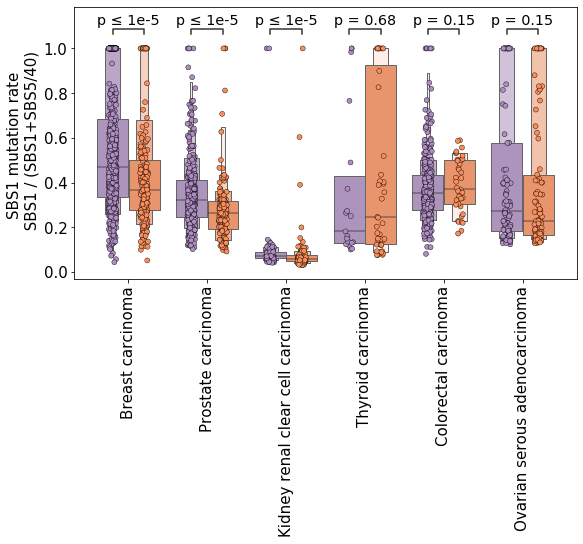

In [153]:
fig,ax=plt.subplots(figsize=(9,5))
sns.boxenplot(data=df_data[df_data["cancer_type"].isin(ttypes_selected)],x="cancer_type",hue="cohort",y="sbs1_mutrate_age",order=ttypes_selected,ax=ax,palette={"Hartwig":"#af8dc3","PCAWG":"#fc8d59"},showfliers=False)
sns.stripplot(data=df_data[df_data["cancer_type"].isin(ttypes_selected)],x="cancer_type",hue="cohort",y="sbs1_mutrate_age",order=ttypes_selected,ax=ax,palette={"Hartwig":"#af8dc3","PCAWG":"#fc8d59"},dodge=True,linewidth=0.4,edgecolor="black")
l=[]
for x in ttypes_selected:
    l+=[((x, "Hartwig"), (x, "PCAWG"))]
test_results = add_stat_annotation(ax=ax, data=df_data[df_data["cancer_type"].isin(ttypes_selected)], x="cancer_type", y="sbs1_mutrate_age",hue="cohort",
                               box_pairs=l,order=ttypes_selected, #,(("CENTROSOMAL_AMP", "INTERACTOR"), ("CENTROSOMAL_AMP", "CO-EXPRESSED")),
                               test='Mann-Whitney', text_format='simple',  loc='inside', verbose=2, fontsize="x-large",comparisons_correction=None,show_test_name=False)
ax.tick_params(axis='x', which='major', labelsize=15,rotation=90)
ax.tick_params(axis='y', which='major', labelsize=15,rotation=0)
ax.set_ylabel("SBS1 mutation rate \n SBS1 / (SBS1+SBS5/40)",fontsize=15)
plt.legend([],[], frameon=False)
ax.set_xlabel("")
plt.savefig(f'../results/figures/comparison_SBS1_mutation_rate_norm_sbs5.pdf', dpi=800,bbox_inches="tight")

### Differences between good/bad prognostic PRAD and PANET tumors (specific response to reviewers)

In [133]:
df_meta["progression_status_code"].value_counts()

MET        439
ST/RM       83
PROG/RL     41
Name: progression_status_code, dtype: int64

In [184]:
df_data_s = df_data.merge(df_meta[(df_meta["progression_status_code"].isin(["ST/RM","PROG/RL","MET"]))&(df_meta["cancer_type_code"].isin(["PRAD","PANET"]))][["sample_id","progression_status_code"]])
df_data_s["SBS1_age_adj"] = df_data_s["sbs1_count"] / df_data_s["age"]

Pancreas neuroendocrine_PROG/RL v.s. Pancreas neuroendocrine_ST/RM: Mann-Whitney-Wilcoxon test two-sided, P_val=1.824e-03 U_stat=1.032e+03
Prostate carcinoma_PROG/RL v.s. Prostate carcinoma_ST/RM: Mann-Whitney-Wilcoxon test two-sided, P_val=1.778e-01 U_stat=2.510e+02
Prostate carcinoma_MET v.s. Prostate carcinoma_PROG/RL: Mann-Whitney-Wilcoxon test two-sided, P_val=4.981e-04 U_stat=3.370e+03
Pancreas neuroendocrine_MET v.s. Pancreas neuroendocrine_PROG/RL: Mann-Whitney-Wilcoxon test two-sided, P_val=4.009e-02 U_stat=5.530e+02
Pancreas neuroendocrine_MET v.s. Pancreas neuroendocrine_ST/RM: Mann-Whitney-Wilcoxon test two-sided, P_val=9.446e-06 U_stat=1.161e+03
Prostate carcinoma_MET v.s. Prostate carcinoma_ST/RM: Mann-Whitney-Wilcoxon test two-sided, P_val=2.887e-16 U_stat=1.084e+04


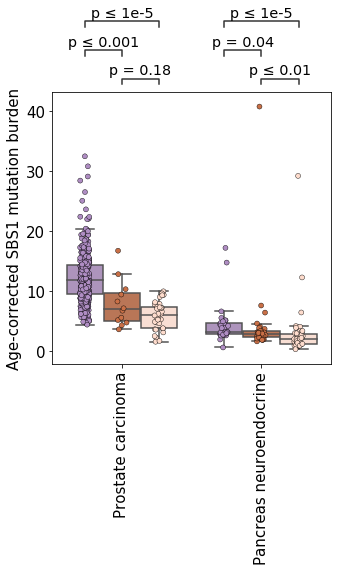

In [186]:
fig,ax=plt.subplots(figsize=(5,5))
order=['Prostate carcinoma','Pancreas neuroendocrine']

sns.boxplot(data=df_data_s,x="cancer_type",hue="progression_status_code",y="SBS1_age_adj",order=order,ax=ax,showfliers=False,palette={"PROG/RL":"#c97047","ST/RM":"#FEDCCD","MET":"#af8dc3"})
sns.stripplot(data=df_data_s,x="cancer_type",hue="progression_status_code",y="SBS1_age_adj",order=order,ax=ax,dodge=True,linewidth=0.4,edgecolor="black",palette={"PROG/RL":"#c97047","ST/RM":"#FEDCCD","MET":"#af8dc3"})
l=[]
for x in order:
    l+=[((x, "ST/RM"), (x, "PROG/RL"))]
    l+=[((x, "ST/RM"), (x, "MET"))]
    l+=[((x, "PROG/RL"), (x, "MET"))]


test_results = add_stat_annotation(ax=ax, data=df_data_s, x="cancer_type", y="SBS1_age_adj",hue="progression_status_code",
                               box_pairs=l,order=order, #,(("CENTROSOMAL_AMP", "INTERACTOR"), ("CENTROSOMAL_AMP", "CO-EXPRESSED")),
                           test='Mann-Whitney', text_format='simple',  loc='outside', verbose=2, fontsize="x-large",comparisons_correction=None,show_test_name=False)
ax.tick_params(axis='x', which='major', labelsize=15,rotation=90)
ax.tick_params(axis='y', which='major', labelsize=15,rotation=0)
ax.set_ylabel("Age-corrected SBS1 mutation burden",fontsize=15)

ax.set_xlabel("")
#ax.set_ylim(0,2500)
plt.legend([],[], frameon=False)
plt.savefig(f'../results/figures/comparison_sbs1_mut_burden_primary_progression_status.pdf', dpi=800,bbox_inches="tight")

In [183]:
df_data_s.groupby(["cancer_type_code","progression_status_code"]).agg({"sbs1_count":np.nanmedian})

sbs1_count
cancer_type_code progression_status_code            
PANET            MET                           200.0
                 PROG/RL                       158.0
                 ST/RM                         108.0
PRAD             MET                           782.0
                 PROG/RL                       353.0
                 ST/RM                         298.0